
# **서울시 따릉이 대여량 예측 프로그램**


dataset : https://dacon.io/competitions/official/235576/data  
서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 데이터

#### 목차
1. 데이터셋 로드, 전처리
2. 데이터 셋 분리
3. 기계 학습 
4. 검증(교차검증)
5. 앙상블

#### 데이터 표기(* 표시 데이터는 중요한 데이터를 의미)

1. hour : 시간 
2. *temperature : 온도 
3. *precipitation : 비가 오지 않았으면 0, 비가 오면 1  
4. windspeed : 풍속(평균)  
5. humidity : 습도  
6. visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
7. ozone : 오존 
8. *pm10: 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
9. *pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
10. *count : 시간에 따른 따릉이 대여 수


In [1]:
# 1. 데이터 셋 로드, 전처리
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head(10) 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [3]:
test = pd.read_csv('test.csv')
test.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
5,10,9,20.2,0.0,4.3,39.0,2000.0,0.034,22.0,7.0
6,11,18,19.0,0.0,2.7,80.0,2000.0,0.028,17.0,12.0
7,12,18,31.2,0.0,2.2,42.0,621.0,0.117,94.0,69.0
8,15,6,20.1,0.0,0.8,78.0,463.0,0.026,57.0,33.0
9,17,8,17.0,1.0,0.9,100.0,200.0,0.022,12.0,12.0


In [4]:
submission = pd.read_csv('submission.csv')
submission.head(10)

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
5,10,NaN
6,11,NaN
7,12,NaN
8,15,NaN
9,17,NaN


In [5]:
# 데이터 칼럼 타입 확인
print('\n ### train 데이터 정보 ### \n')
print(train.info())


 ### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None


In [6]:
# 데이터 칼럼 타입 확인
print('\n ### test 데이터 정보 ### \n')
print(test.info())



 ### test 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB
None


id                            AxesSubplot(0.125,0.71587;0.168478x0.16413)
hour                       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
hour_bef_temperature       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
hour_bef_precipitation     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
hour_bef_windspeed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
hour_bef_humidity         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
hour_bef_visibility       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
hour_bef_ozone            AxesSubplot(0.731522,0.518913;0.168478x0.16413)
hour_bef_pm10                AxesSubplot(0.125,0.321957;0.168478x0.16413)
hour_bef_pm2.5            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
count                     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

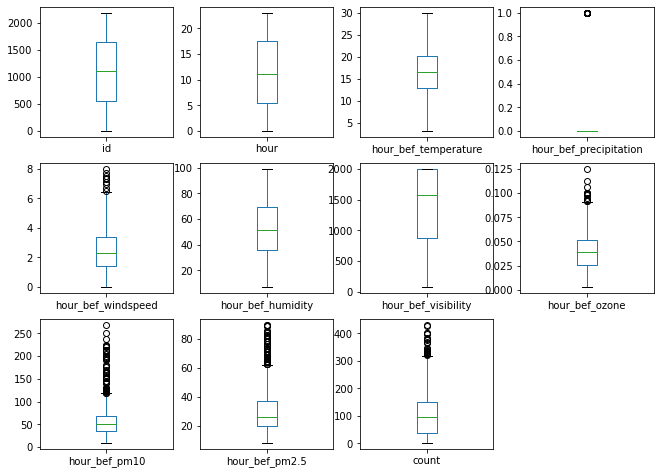

In [7]:
#박스 플롯은 데이터들을 전부 확인하기 어려울 때 통계적인 이상치가 있는지 확인이 가능하다.
train.plot(kind = 'box', subplots = True, layout=(4,4), figsize=(11, 11))

id                            AxesSubplot(0.125,0.71587;0.168478x0.16413)
hour                       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
hour_bef_temperature       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
hour_bef_precipitation     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
hour_bef_windspeed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
hour_bef_humidity         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
hour_bef_visibility       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
hour_bef_ozone            AxesSubplot(0.731522,0.518913;0.168478x0.16413)
hour_bef_pm10                AxesSubplot(0.125,0.321957;0.168478x0.16413)
hour_bef_pm2.5            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

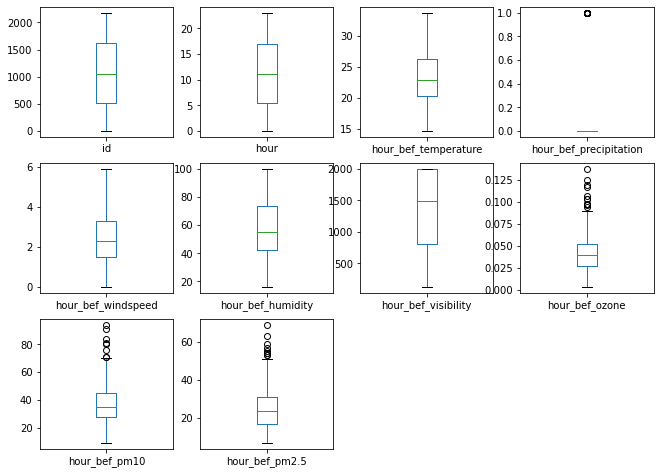

In [8]:
test.plot(kind = 'box', subplots = True, layout=(4,4), figsize=(11,11))

In [9]:
# 결손값 처리
# pm10, pm2.5, ozone은 값이 비어있는 값들이 많음
# inplace가True이면 모든NaN 값을 주어진value로 대체한다.
# 해당열의 평균값으로 대체했다.

train.fillna(train.mean(),inplace=True)

In [10]:
train.isnull()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,False,False,False,False,False
1455,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# null값이 있는지 확인
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [12]:
# 변수명이 너무 길어서 알아보기 쉽게 변경
train.rename(columns = {'hour_bef_temperature':'temperature','hour_bef_precipitation':'precipitation','hour_bef_pm10':'pm10','hour_bef_pm2.5':'pm2.5',       
'hour_bef_windspeed': 'windspeed', 'hour_bef_humidity':'humidity','hour_bef_visibility':'visibility','hour_bef_ozone':'ozone', },inplace=True)
train


,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


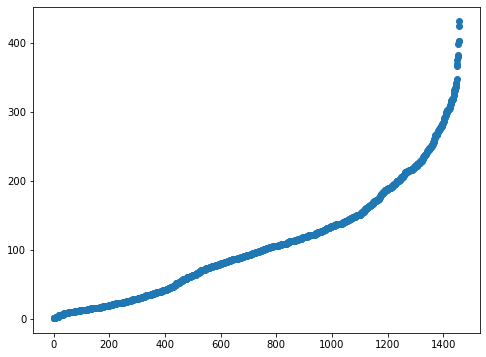

In [13]:
#데이터 시각화 시작
#따릉이 대여수 이상치 분석 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train['count'].values))
plt.show()



8.0

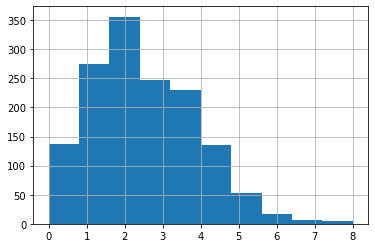

In [14]:
# 풍속 변수인데 따릉이 예측에 필요한 데이터는 아닌거 같다.
train['windspeed'].hist()
train['windspeed'].max()

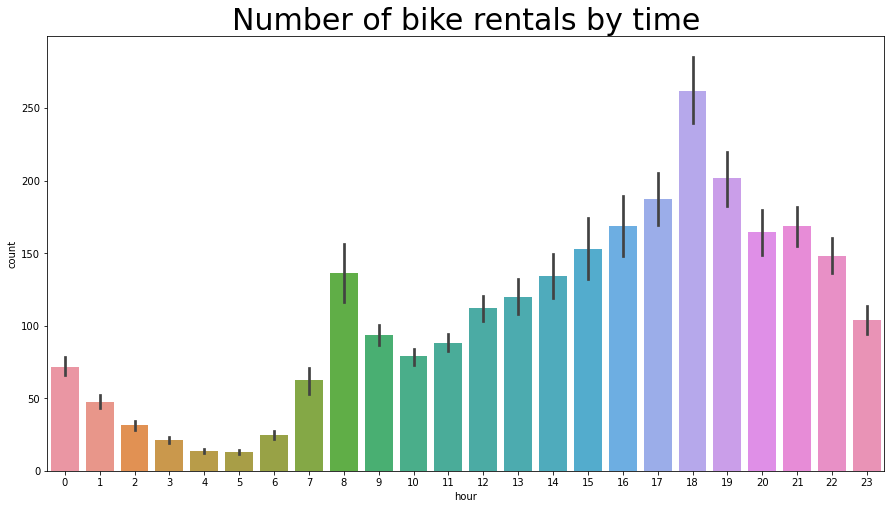

In [15]:
# 시간에 따른 따릉이 대여수

import seaborn as sns

plt.figure(figsize = (15,8))

sns.barplot(x = train['hour'], y = train['count'])
plt.title('Number of bike rentals by time', fontsize = 30)
plt.show()

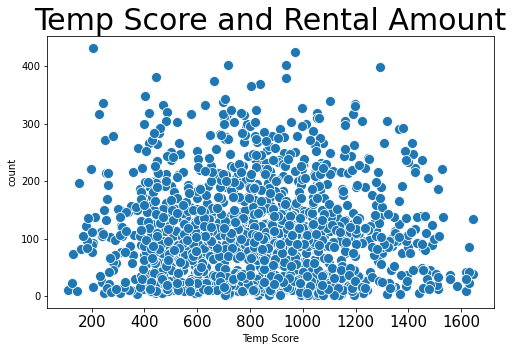

In [16]:
# 온도 + 습도와 따릉이 대여량의 관계 

temp_score = train['temperature'] * train['humidity']

plt.figure(figsize = (8,5))
sns.scatterplot(x = temp_score, y = train['count'],  s = 100)
plt.xticks(fontsize = 15)
plt.title('Temp Score and Rental Amount', fontsize = 30)
plt.xlabel('Temp Score')
plt.show()

<AxesSubplot:>

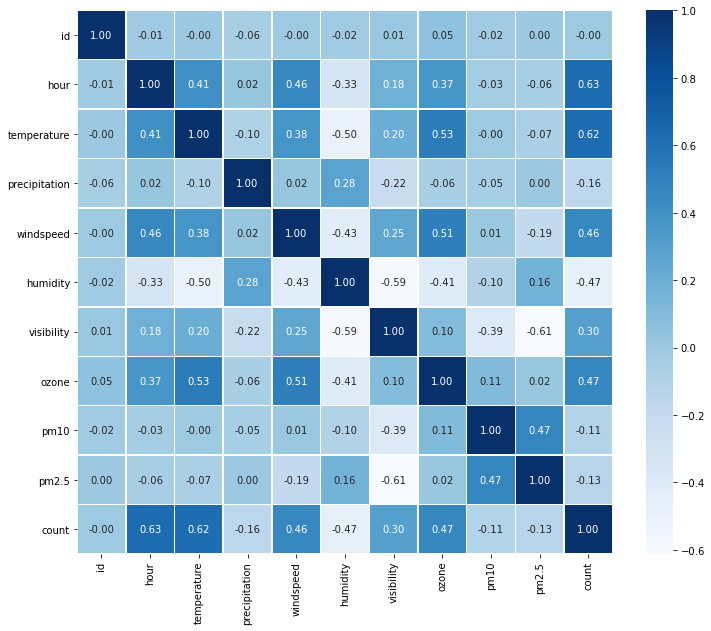

In [17]:
#상관관계 도출

plt.figure(figsize = (12,10))
sns.heatmap(data = train.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

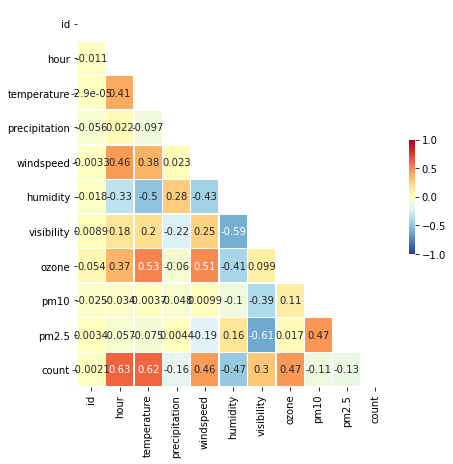

In [18]:
fig, ax = plt.subplots(figsize=(7,7))

corr = train.corr()
mask = np.zeros_like(corr, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask,
annot = True, linewidth=.5,
cmap = 'RdYlBu_r', cbar_kws = {"shrink": .3}, # shrink cbar(cmap)
vmin = -1, vmax = 1)
plt.show()

# 미세먼지에 관한 분석 #

<img src = "https://drive.google.com/uc?id=1nIdrmF3ys452z9TSyqgwSYACBZCdtXXB" height = 300 width = 500>

In [19]:
pm=['pm10','pm2.5']

#정렬 순서
pm_order=[
    'good',
    'not bad',
    'bad',
    'very bad'
]
#미세먼지 수치에 매우 나쁨(very bad), 나쁨(bad), 보통(not bad), 좋음(good)으로 바꿉니다
for pm_i in pm:
  train[pm_i] = train[pm_i].apply(lambda x : 'very bad' if x >=76 else 'bad' if x>=36 else 'not bad' if x>=16 else 'good')

In [20]:
pm_2 = train['pm2.5'].value_counts()[pm_order]
pm_10 = train['pm10'].value_counts()[pm_order]
print(pm_2)
print(pm_10)

good        116
not bad     967
bad         358
very bad     18
Name: pm2.5, dtype: int64
good          5
not bad     332
bad         869
very bad    253
Name: pm10, dtype: int64


In [21]:
#미세먼지나쁜 순서대로 따릉이 사용량 구하기 0은 미세먼지 1은 초미세먼지

pm10_total=pd.DataFrame()
pm2_total=pd.DataFrame()


for pm_i in pm:
  for col in pm_order:
    if pm_i=='pm10':
      pm10_total[str(col)]=[int(train[train[pm_i]==col]['count'].sum())]
    else:
      pm2_total[str(col)]=[int(train[train[pm_i]==col]['count'].sum())]
pm2_total=pm2_total.transpose()[0][pm_order]
pm10_total=pm10_total.transpose()[0][pm_order]      

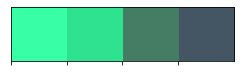

In [22]:
#따릉이 색깔
sns.palplot(['#38FFA5','#2FE290','#447D64', '#445664'])
original_color=['#38FFA5','#2FE290','#447D64', '#445664']

pm10 = 미세먼지<br>
희안하게 미세먼지가 보통 보다 나쁨일 때 따릉이 사용량이 많은것을 알 수 있습니다. 데이터 셋에 <br>미세먼지가 **보통**일 때 보다 **나쁨**일 때 데이터의 양이 많아서 그럴 것이란 추측이 듭니다.

<ipython-input-23-2cb11a7ea617>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pm10_total.index, fontfamily='serif')


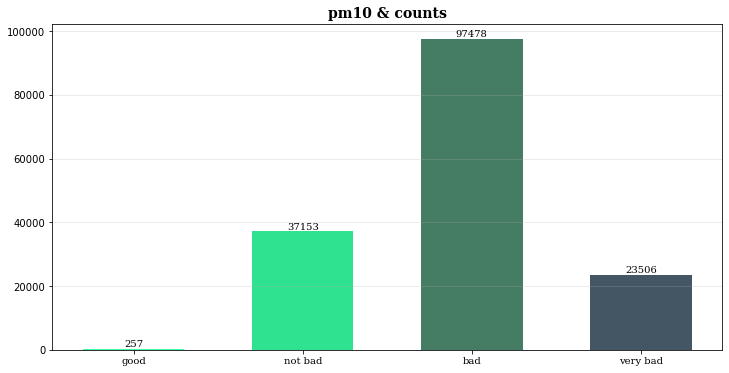

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))

for i,color in enumerate(original_color):
  ax.bar(pm10_total.index[i], pm10_total[i], width=0.60, 
        color=color)

for i in pm10_total.index:
    ax.annotate(f"{pm10_total[i]}", 
                   xy=(i, pm10_total[i]+1500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10,
                   color='black')

ax.set_xticklabels(pm10_total.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)    
ax.set_title('pm10 & counts',fontsize=14,fontweight='bold',fontfamily='serif')
plt.show()

pm2.5 = 초미세먼지<br>
반대로 초미세먼지가 **나쁨**일때는 사용량이 적고, 초미세먼지가 <br>
**보통**일때, 사용량이 많은 것을 알 수 있습니다.

<ipython-input-24-ed51f778b124>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pm2_total.index, fontfamily='serif')


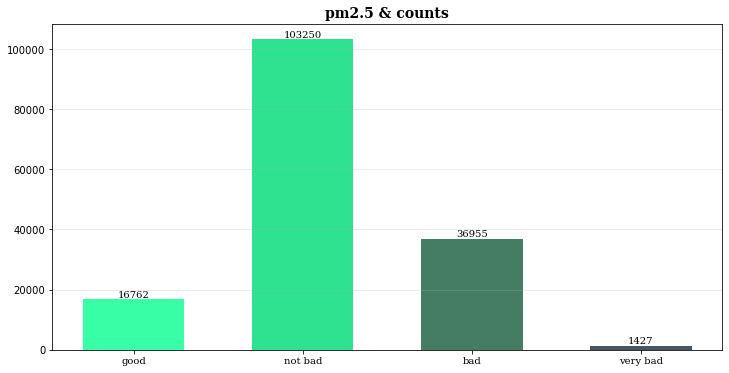

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
for i,color in enumerate(original_color):
  ax.bar(pm2_total.index[i], pm2_total[i], width=0.60, 
        color=color)

for i in pm2_total.index:
    ax.annotate(f"{pm2_total[i]}", 
                   xy=(i, pm2_total[i]+1500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10,
                   color='black')

ax.set_xticklabels(pm2_total.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)    
ax.set_title('pm2.5 & counts',fontsize=14,fontweight='bold',fontfamily='serif')
plt.show()

## 비에 관한 분석 ##

In [25]:
rain_1=train[train['precipitation']==1.0]['precipitation'].count()
rain_0=train[train['precipitation']==0.0]['precipitation'].count()

In [26]:
print(f'비가 온 시간 : {rain_1}, 비가 안온 시간 : {rain_0}')

비가 온 시간 : 46, 비가 안온 시간 : 1411


In [27]:
#시간대별 따릉이 이용수
rain_total=pd.DataFrame()
states=['clean','rainy']
total=0
for i,state in enumerate(states):
  if i==0:
    total+=int((train[train['precipitation']==i]['count']).sum())/rain_0
  else:
    total+=int((train[train['precipitation']==i]['count']).sum())/rain_1
for i,state in enumerate(states):
  if i==0:
    rain_total[str(state)]=[round((int((train[train['precipitation']==i]['count']).sum())/rain_0)/total,1)]
  else:
    rain_total[str(state)]=[round((int((train[train['precipitation']==i]['count']).sum())/rain_1)/total,1)]
    
rain_total=rain_total.transpose()[0]

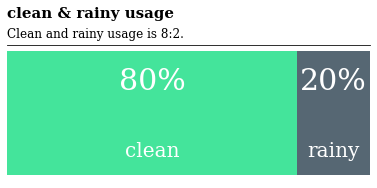

In [28]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(0.7, rain_total['clean'], 
        color=original_color[1], alpha=0.9, label='clean')
ax.barh(0.7, rain_total['rainy'], left=rain_total['clean'], 
        color=original_color[-1], alpha=0.9, label='rainy')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(rain_total.index, fontfamily='serif', fontsize=11)

# clean percentage
ax.annotate(f"{int(rain_total['clean']*100)}%", 
                   xy=(rain_total['clean']/2,0.9),
                   va = 'center', ha='center',fontsize=30, 
                   fontweight='light', fontfamily='serif',
                   color='white')

ax.annotate("clean", 
                   xy=(rain_total['clean']/2, 0.45),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')
    
    
ax.annotate(f"{int(rain_total['rainy']*100)}%", 
                   xy=(rain_total['clean']+rain_total['rainy']/2, 0.9),
                   va = 'center', ha='center',fontsize=30
                   , fontweight='light', fontfamily='serif',
                   color='white')
ax.annotate("rainy", 
                   xy=(rain_total['clean']+rain_total['rainy']/2, 0.45),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'clean & rainy usage', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'Clean and rainy usage is 8:2.',fontfamily='serif',fontsize=12)  

for s in [
  'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

In [29]:
#필요 없는 피쳐 제거 Feature Selection 

In [30]:
train['pm10'].value_counts()

bad         869
not bad     332
very bad    253
good          5
Name: pm10, dtype: int64

In [31]:
train['pm2.5'].value_counts()

not bad     967
bad         358
good        116
very bad     18
Name: pm2.5, dtype: int64

In [32]:
train['pm10'] = pd.get_dummies(train['pm10'])

In [33]:
train['pm2.5'] = pd.get_dummies(train['pm2.5'])

In [34]:
train = train.drop(['id'], axis = 1) #id는 분석에 필요가 없다.

In [35]:
train.head()

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,0,0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,1,1,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,0,0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,1,1,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,0,0,431.0


In [36]:
#2. 데이터 셋 분리 

In [37]:
# test도 똑같이 변수명이 너무 길어서 알아보기 쉽게 변경
test.rename(columns = {'hour_bef_temperature':'temperature','hour_bef_precipitation':'precipitation','hour_bef_pm10':'pm10','hour_bef_pm2.5':'pm2.5',       
'hour_bef_windspeed': 'windspeed', 'hour_bef_humidity':'humidity','hour_bef_visibility':'visibility','hour_bef_ozone':'ozone', },inplace=True)
train


,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,0,0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,1,1,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,0,0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,1,1,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,0,0,431.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031,1,0,21.0
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039,0,0,20.0
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009,0,0,22.0
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082,1,1,216.0


In [38]:
train_list = ['hour','temperature','precipitation','humidity','visibility','pm10','pm2.5','ozone','windspeed']

In [39]:
train_pred = ['count']

In [40]:
from sklearn.model_selection import train_test_split #어떤 모델이 좋은지 알아보기 위해서 쓴다.
x_train, x_test, y_train, y_test = train_test_split(train[train_list], train['count'], random_state = 42,test_size = 0.1)

In [41]:
x_train

,hour,temperature,precipitation,humidity,visibility,pm10,pm2.5,ozone,windspeed
906,11,12.3,0.0,13.0,2000.0,1,0,0.036000,4.5
781,20,15.0,0.0,81.0,979.0,1,0,0.040000,2.7
1278,1,14.1,0.0,69.0,1970.0,1,0,0.039149,1.3
620,3,13.3,0.0,43.0,2000.0,0,0,0.037000,2.5
668,9,12.1,0.0,35.0,1975.0,1,0,0.028000,4.1
...,...,...,...,...,...,...,...,...,...
1095,6,10.7,0.0,99.0,78.0,0,0,0.034000,2.5
1130,5,11.9,0.0,90.0,228.0,1,1,0.005000,2.1
1294,14,21.6,0.0,27.0,2000.0,0,0,0.049000,4.5
860,4,11.7,0.0,38.0,1645.0,1,1,0.065000,2.2


In [42]:
x_test

,hour,temperature,precipitation,humidity,visibility,pm10,pm2.5,ozone,windspeed
1321,11,11.700000,0.000000,47.000000,513.000000,0,0,0.031000,2.000000
836,3,10.900000,0.000000,74.000000,730.000000,1,0,0.029000,1.400000
413,10,16.600000,0.000000,53.000000,1145.000000,0,0,0.011000,0.900000
522,11,17.100000,0.000000,55.000000,1982.000000,1,0,0.035000,2.400000
1035,18,16.717433,0.031572,52.231297,1405.216884,1,0,0.039149,2.479034
...,...,...,...,...,...,...,...,...,...
526,16,20.500000,0.000000,34.000000,1962.000000,1,0,0.053000,4.600000
101,3,11.700000,0.000000,98.000000,150.000000,0,0,0.041000,3.900000
882,23,13.500000,0.000000,39.000000,1924.000000,0,0,0.038000,2.200000
411,15,18.800000,0.000000,41.000000,1632.000000,0,0,0.043000,3.800000


In [43]:
x_train, y_train

(      hour  temperature  precipitation  humidity  visibility  pm10  pm2.5  \
 906     11         12.3            0.0      13.0      2000.0     1      0   
 781     20         15.0            0.0      81.0       979.0     1      0   
 1278     1         14.1            0.0      69.0      1970.0     1      0   
 620      3         13.3            0.0      43.0      2000.0     0      0   
 668      9         12.1            0.0      35.0      1975.0     1      0   
 ...    ...          ...            ...       ...         ...   ...    ...   
 1095     6         10.7            0.0      99.0        78.0     0      0   
 1130     5         11.9            0.0      90.0       228.0     1      1   
 1294    14         21.6            0.0      27.0      2000.0     0      0   
 860      4         11.7            0.0      38.0      1645.0     1      1   
 1126    19         19.4            0.0      55.0       649.0     1      1   
 
          ozone  windspeed  
 906   0.036000        4.5  
 781

In [44]:
y_test

1321     55.0
836      29.0
413      63.0
522      98.0
1035      1.0
        ...  
526     337.0
101       3.0
882      63.0
411     119.0
1024     79.0
Name: count, Length: 146, dtype: float64

In [45]:
#3. 모델 학습 및 예측 평가
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error 

#cat_vars = [var for var in train.columns if train[var].dtype == "O"]
#cat_features = cat_vars
cb_reg = CatBoostRegressor()
lgb_reg = LGBMRegressor()
xgb_reg = XGBRegressor()

#CatBoost 
cb_reg.fit(x_train, y_train)
pred1 = cb_reg.predict(x_test)

def RMSE(y_train, pred1):
   return np.sqrt(mean_squared_error(y_train, pred1))
print("CatBoost RMSE : ", RMSE(y_test, pred1))

#LGB 
lgb_reg.fit(x_train,y_train)
pred2 = lgb_reg.predict(x_test)

def RMSE(y_train, pred2):
   return np.sqrt(mean_squared_error(y_train, pred2))
print("LGB RMSE : ", RMSE(y_test, pred2))

#XGB
xgb_reg.fit(x_train, y_train)
pred3 = xgb_reg.predict(x_test)

def RMSE(y_train, pred3):
   return np.sqrt(mean_squared_error(y_train, pred3))
print("XGB RMSE : ", RMSE(y_test, pred3))



Learning rate set to 0.042743
0:	learn: 80.2159136	total: 148ms	remaining: 2m 28s
1:	learn: 78.4853000	total: 151ms	remaining: 1m 15s
2:	learn: 76.5668592	total: 155ms	remaining: 51.4s
3:	learn: 74.7844972	total: 159ms	remaining: 39.5s
4:	learn: 73.0422701	total: 162ms	remaining: 32.2s
5:	learn: 71.3473291	total: 165ms	remaining: 27.4s
6:	learn: 69.6805815	total: 169ms	remaining: 23.9s
7:	learn: 68.2143333	total: 174ms	remaining: 21.6s
8:	learn: 66.9563053	total: 178ms	remaining: 19.6s
9:	learn: 65.5430389	total: 180ms	remaining: 17.9s
10:	learn: 64.5194496	total: 185ms	remaining: 16.7s
11:	learn: 63.4141652	total: 188ms	remaining: 15.5s
12:	learn: 62.1913099	total: 192ms	remaining: 14.5s
13:	learn: 61.1088591	total: 196ms	remaining: 13.8s
14:	learn: 59.9076133	total: 202ms	remaining: 13.2s
15:	learn: 58.8640179	total: 205ms	remaining: 12.6s
16:	learn: 57.9792829	total: 208ms	remaining: 12s
17:	learn: 56.9372561	total: 213ms	remaining: 11.6s
18:	learn: 56.1017170	total: 216ms	remaining

159:	learn: 34.2977680	total: 635ms	remaining: 3.33s
160:	learn: 34.2419581	total: 638ms	remaining: 3.32s
161:	learn: 34.2300182	total: 640ms	remaining: 3.31s
162:	learn: 34.1845789	total: 643ms	remaining: 3.3s
163:	learn: 34.1389103	total: 646ms	remaining: 3.29s
164:	learn: 34.0839245	total: 649ms	remaining: 3.28s
165:	learn: 34.0442239	total: 651ms	remaining: 3.27s
166:	learn: 33.9941098	total: 654ms	remaining: 3.26s
167:	learn: 33.9738211	total: 657ms	remaining: 3.25s
168:	learn: 33.9113029	total: 660ms	remaining: 3.25s
169:	learn: 33.8345779	total: 663ms	remaining: 3.24s
170:	learn: 33.8145008	total: 665ms	remaining: 3.23s
171:	learn: 33.7695639	total: 668ms	remaining: 3.21s
172:	learn: 33.7439436	total: 671ms	remaining: 3.21s
173:	learn: 33.6788596	total: 674ms	remaining: 3.2s
174:	learn: 33.6337613	total: 676ms	remaining: 3.19s
175:	learn: 33.5948262	total: 679ms	remaining: 3.18s
176:	learn: 33.5608959	total: 681ms	remaining: 3.17s
177:	learn: 33.5550004	total: 684ms	remaining: 3

367:	learn: 27.5306649	total: 1.24s	remaining: 2.14s
368:	learn: 27.4870388	total: 1.25s	remaining: 2.13s
369:	learn: 27.4647427	total: 1.25s	remaining: 2.13s
370:	learn: 27.4195830	total: 1.25s	remaining: 2.12s
371:	learn: 27.3749025	total: 1.25s	remaining: 2.12s
372:	learn: 27.3374316	total: 1.26s	remaining: 2.12s
373:	learn: 27.2987920	total: 1.26s	remaining: 2.11s
374:	learn: 27.2931674	total: 1.26s	remaining: 2.11s
375:	learn: 27.2660009	total: 1.27s	remaining: 2.1s
376:	learn: 27.2591003	total: 1.27s	remaining: 2.1s
377:	learn: 27.2236256	total: 1.27s	remaining: 2.1s
378:	learn: 27.1699596	total: 1.28s	remaining: 2.09s
379:	learn: 27.1683680	total: 1.28s	remaining: 2.09s
380:	learn: 27.1399409	total: 1.28s	remaining: 2.08s
381:	learn: 27.1179464	total: 1.28s	remaining: 2.08s
382:	learn: 27.1161963	total: 1.29s	remaining: 2.07s
383:	learn: 27.0735732	total: 1.29s	remaining: 2.07s
384:	learn: 27.0567636	total: 1.29s	remaining: 2.07s
385:	learn: 27.0265994	total: 1.3s	remaining: 2.0

560:	learn: 23.3870882	total: 1.85s	remaining: 1.45s
561:	learn: 23.3709370	total: 1.85s	remaining: 1.45s
562:	learn: 23.3523046	total: 1.86s	remaining: 1.44s
563:	learn: 23.3111625	total: 1.86s	remaining: 1.44s
564:	learn: 23.2981532	total: 1.86s	remaining: 1.44s
565:	learn: 23.2841201	total: 1.87s	remaining: 1.43s
566:	learn: 23.2597308	total: 1.87s	remaining: 1.43s
567:	learn: 23.2589942	total: 1.87s	remaining: 1.42s
568:	learn: 23.2299812	total: 1.88s	remaining: 1.42s
569:	learn: 23.2097233	total: 1.88s	remaining: 1.42s
570:	learn: 23.1905625	total: 1.88s	remaining: 1.41s
571:	learn: 23.1754697	total: 1.89s	remaining: 1.41s
572:	learn: 23.1537908	total: 1.89s	remaining: 1.41s
573:	learn: 23.1286726	total: 1.89s	remaining: 1.4s
574:	learn: 23.1075006	total: 1.9s	remaining: 1.4s
575:	learn: 23.0800637	total: 1.9s	remaining: 1.4s
576:	learn: 23.0490327	total: 1.9s	remaining: 1.39s
577:	learn: 23.0482944	total: 1.91s	remaining: 1.39s
578:	learn: 23.0257741	total: 1.91s	remaining: 1.39s

754:	learn: 20.0488870	total: 2.46s	remaining: 798ms
755:	learn: 20.0311999	total: 2.46s	remaining: 794ms
756:	learn: 19.9966775	total: 2.46s	remaining: 791ms
757:	learn: 19.9815788	total: 2.47s	remaining: 788ms
758:	learn: 19.9654958	total: 2.47s	remaining: 785ms
759:	learn: 19.9600072	total: 2.47s	remaining: 781ms
760:	learn: 19.9385554	total: 2.48s	remaining: 778ms
761:	learn: 19.9280963	total: 2.48s	remaining: 774ms
762:	learn: 19.9256093	total: 2.48s	remaining: 771ms
763:	learn: 19.9126155	total: 2.49s	remaining: 768ms
764:	learn: 19.9098881	total: 2.49s	remaining: 765ms
765:	learn: 19.8974813	total: 2.49s	remaining: 761ms
766:	learn: 19.8865408	total: 2.5s	remaining: 758ms
767:	learn: 19.8737877	total: 2.5s	remaining: 755ms
768:	learn: 19.8712813	total: 2.5s	remaining: 752ms
769:	learn: 19.8652897	total: 2.5s	remaining: 748ms
770:	learn: 19.8518906	total: 2.51s	remaining: 745ms
771:	learn: 19.8371127	total: 2.51s	remaining: 742ms
772:	learn: 19.8191530	total: 2.51s	remaining: 738

955:	learn: 17.2915049	total: 3.07s	remaining: 141ms
956:	learn: 17.2855123	total: 3.07s	remaining: 138ms
957:	learn: 17.2728237	total: 3.07s	remaining: 135ms
958:	learn: 17.2572389	total: 3.08s	remaining: 131ms
959:	learn: 17.2471031	total: 3.08s	remaining: 128ms
960:	learn: 17.2413524	total: 3.08s	remaining: 125ms
961:	learn: 17.2189043	total: 3.09s	remaining: 122ms
962:	learn: 17.1954512	total: 3.09s	remaining: 119ms
963:	learn: 17.1865549	total: 3.09s	remaining: 116ms
964:	learn: 17.1756001	total: 3.1s	remaining: 112ms
965:	learn: 17.1511680	total: 3.1s	remaining: 109ms
966:	learn: 17.1355102	total: 3.1s	remaining: 106ms
967:	learn: 17.1265675	total: 3.11s	remaining: 103ms
968:	learn: 17.1186056	total: 3.11s	remaining: 99.5ms
969:	learn: 17.1079008	total: 3.11s	remaining: 96.3ms
970:	learn: 17.0972639	total: 3.11s	remaining: 93ms
971:	learn: 17.0908027	total: 3.12s	remaining: 89.8ms
972:	learn: 17.0817142	total: 3.12s	remaining: 86.6ms
973:	learn: 17.0739853	total: 3.12s	remaining:

### 여기서는 K폴드 교차검증방식을 사용해서 검증을 하는 부분입니다.



- CatBoostRegressor을 사용해서 학습한 모델의 검증 
###### 평균 정확도는 0.7931가 나왔다.

In [46]:
# 4.검증(교차검증)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cb_reg, train[train_list], train['count'],cv=10)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))


Learning rate set to 0.042743
0:	learn: 80.4102160	total: 3.59ms	remaining: 3.58s
1:	learn: 78.5462616	total: 6.71ms	remaining: 3.35s
2:	learn: 76.5862151	total: 9.56ms	remaining: 3.18s
3:	learn: 74.7268964	total: 12.5ms	remaining: 3.11s
4:	learn: 72.9742781	total: 15.6ms	remaining: 3.1s
5:	learn: 71.2146301	total: 19.1ms	remaining: 3.16s
6:	learn: 69.5663638	total: 21.9ms	remaining: 3.11s
7:	learn: 68.2103264	total: 24.7ms	remaining: 3.06s
8:	learn: 66.9469187	total: 27.6ms	remaining: 3.04s
9:	learn: 65.5321258	total: 32.3ms	remaining: 3.19s
10:	learn: 64.3694569	total: 35.4ms	remaining: 3.18s
11:	learn: 63.2218261	total: 38.3ms	remaining: 3.15s
12:	learn: 62.0083858	total: 41.2ms	remaining: 3.13s
13:	learn: 60.8737760	total: 44.8ms	remaining: 3.15s
14:	learn: 59.7038990	total: 47.6ms	remaining: 3.13s
15:	learn: 58.7218399	total: 49.7ms	remaining: 3.06s
16:	learn: 57.6882464	total: 52.6ms	remaining: 3.04s
17:	learn: 56.8064700	total: 57.9ms	remaining: 3.16s
18:	learn: 55.9420105	total

157:	learn: 34.1536839	total: 543ms	remaining: 2.89s
158:	learn: 34.1506991	total: 544ms	remaining: 2.88s
159:	learn: 34.1016361	total: 547ms	remaining: 2.87s
160:	learn: 34.0676846	total: 550ms	remaining: 2.87s
161:	learn: 34.0127937	total: 554ms	remaining: 2.86s
162:	learn: 33.9487036	total: 557ms	remaining: 2.86s
163:	learn: 33.9048545	total: 561ms	remaining: 2.86s
164:	learn: 33.8826779	total: 566ms	remaining: 2.86s
165:	learn: 33.8540505	total: 569ms	remaining: 2.86s
166:	learn: 33.7743606	total: 572ms	remaining: 2.85s
167:	learn: 33.7414275	total: 575ms	remaining: 2.85s
168:	learn: 33.7289107	total: 579ms	remaining: 2.85s
169:	learn: 33.6473098	total: 583ms	remaining: 2.84s
170:	learn: 33.6231922	total: 586ms	remaining: 2.84s
171:	learn: 33.5692137	total: 588ms	remaining: 2.83s
172:	learn: 33.5433573	total: 594ms	remaining: 2.84s
173:	learn: 33.5334487	total: 597ms	remaining: 2.83s
174:	learn: 33.4853917	total: 600ms	remaining: 2.83s
175:	learn: 33.4584042	total: 604ms	remaining:

327:	learn: 28.5578424	total: 1.14s	remaining: 2.34s
328:	learn: 28.5331676	total: 1.15s	remaining: 2.33s
329:	learn: 28.5128911	total: 1.15s	remaining: 2.33s
330:	learn: 28.4774045	total: 1.15s	remaining: 2.33s
331:	learn: 28.4606009	total: 1.16s	remaining: 2.33s
332:	learn: 28.4080133	total: 1.16s	remaining: 2.33s
333:	learn: 28.3928119	total: 1.17s	remaining: 2.33s
334:	learn: 28.3689149	total: 1.17s	remaining: 2.32s
335:	learn: 28.3531716	total: 1.17s	remaining: 2.32s
336:	learn: 28.3418346	total: 1.18s	remaining: 2.32s
337:	learn: 28.3169464	total: 1.18s	remaining: 2.31s
338:	learn: 28.3142441	total: 1.18s	remaining: 2.31s
339:	learn: 28.2713799	total: 1.19s	remaining: 2.3s
340:	learn: 28.2257280	total: 1.19s	remaining: 2.31s
341:	learn: 28.2040637	total: 1.2s	remaining: 2.3s
342:	learn: 28.1763613	total: 1.2s	remaining: 2.3s
343:	learn: 28.1430139	total: 1.2s	remaining: 2.3s
344:	learn: 28.1134969	total: 1.21s	remaining: 2.29s
345:	learn: 28.0775439	total: 1.21s	remaining: 2.29s


490:	learn: 24.6703319	total: 1.64s	remaining: 1.7s
491:	learn: 24.6579502	total: 1.64s	remaining: 1.7s
492:	learn: 24.6461553	total: 1.65s	remaining: 1.7s
493:	learn: 24.6227009	total: 1.65s	remaining: 1.69s
494:	learn: 24.6119204	total: 1.65s	remaining: 1.69s
495:	learn: 24.5756211	total: 1.66s	remaining: 1.69s
496:	learn: 24.5569171	total: 1.66s	remaining: 1.68s
497:	learn: 24.5484923	total: 1.66s	remaining: 1.68s
498:	learn: 24.5284173	total: 1.67s	remaining: 1.67s
499:	learn: 24.5131837	total: 1.67s	remaining: 1.67s
500:	learn: 24.5043072	total: 1.67s	remaining: 1.67s
501:	learn: 24.4659360	total: 1.68s	remaining: 1.66s
502:	learn: 24.4378958	total: 1.68s	remaining: 1.66s
503:	learn: 24.4314835	total: 1.68s	remaining: 1.66s
504:	learn: 24.4143700	total: 1.69s	remaining: 1.65s
505:	learn: 24.3919624	total: 1.69s	remaining: 1.65s
506:	learn: 24.3668612	total: 1.69s	remaining: 1.65s
507:	learn: 24.3626895	total: 1.7s	remaining: 1.64s
508:	learn: 24.3041227	total: 1.7s	remaining: 1.64

648:	learn: 21.7018362	total: 2.1s	remaining: 1.14s
649:	learn: 21.6852626	total: 2.1s	remaining: 1.13s
650:	learn: 21.6722924	total: 2.1s	remaining: 1.13s
651:	learn: 21.6693955	total: 2.11s	remaining: 1.13s
652:	learn: 21.6535030	total: 2.11s	remaining: 1.12s
653:	learn: 21.6290391	total: 2.12s	remaining: 1.12s
654:	learn: 21.6186446	total: 2.12s	remaining: 1.11s
655:	learn: 21.5980408	total: 2.12s	remaining: 1.11s
656:	learn: 21.5775668	total: 2.13s	remaining: 1.11s
657:	learn: 21.5573845	total: 2.13s	remaining: 1.11s
658:	learn: 21.5551124	total: 2.13s	remaining: 1.1s
659:	learn: 21.5189041	total: 2.13s	remaining: 1.1s
660:	learn: 21.5028272	total: 2.14s	remaining: 1.1s
661:	learn: 21.4883998	total: 2.14s	remaining: 1.09s
662:	learn: 21.4614052	total: 2.14s	remaining: 1.09s
663:	learn: 21.4475971	total: 2.15s	remaining: 1.09s
664:	learn: 21.4281042	total: 2.15s	remaining: 1.08s
665:	learn: 21.4060454	total: 2.15s	remaining: 1.08s
666:	learn: 21.3865361	total: 2.16s	remaining: 1.08s

833:	learn: 19.0401386	total: 2.65s	remaining: 528ms
834:	learn: 19.0363226	total: 2.66s	remaining: 525ms
835:	learn: 19.0168805	total: 2.66s	remaining: 522ms
836:	learn: 19.0164576	total: 2.66s	remaining: 518ms
837:	learn: 18.9974720	total: 2.66s	remaining: 515ms
838:	learn: 18.9816881	total: 2.67s	remaining: 512ms
839:	learn: 18.9648184	total: 2.67s	remaining: 509ms
840:	learn: 18.9411086	total: 2.67s	remaining: 505ms
841:	learn: 18.9277596	total: 2.68s	remaining: 502ms
842:	learn: 18.9224321	total: 2.68s	remaining: 499ms
843:	learn: 18.9087092	total: 2.68s	remaining: 496ms
844:	learn: 18.8780384	total: 2.69s	remaining: 493ms
845:	learn: 18.8631465	total: 2.69s	remaining: 489ms
846:	learn: 18.8416525	total: 2.69s	remaining: 486ms
847:	learn: 18.8409773	total: 2.69s	remaining: 483ms
848:	learn: 18.8403697	total: 2.69s	remaining: 479ms
849:	learn: 18.8398752	total: 2.7s	remaining: 476ms
850:	learn: 18.8395420	total: 2.7s	remaining: 473ms
851:	learn: 18.8390415	total: 2.7s	remaining: 47

999:	learn: 17.0521207	total: 3.16s	remaining: 0us
Learning rate set to 0.042743
0:	learn: 81.3186447	total: 3.98ms	remaining: 3.98s
1:	learn: 79.5555791	total: 7.19ms	remaining: 3.59s
2:	learn: 77.5992591	total: 10.1ms	remaining: 3.35s
3:	learn: 75.7807550	total: 12.9ms	remaining: 3.21s
4:	learn: 74.2357651	total: 16ms	remaining: 3.19s
5:	learn: 72.4517864	total: 19.4ms	remaining: 3.21s
6:	learn: 70.7581133	total: 22.2ms	remaining: 3.15s
7:	learn: 69.3644014	total: 25.3ms	remaining: 3.13s
8:	learn: 68.0452203	total: 28.9ms	remaining: 3.18s
9:	learn: 66.5883095	total: 32.1ms	remaining: 3.18s
10:	learn: 65.4371699	total: 34.9ms	remaining: 3.14s
11:	learn: 64.3128028	total: 37.8ms	remaining: 3.11s
12:	learn: 63.1271511	total: 40.9ms	remaining: 3.1s
13:	learn: 61.9655219	total: 44.7ms	remaining: 3.15s
14:	learn: 60.7571302	total: 47.5ms	remaining: 3.12s
15:	learn: 59.7812672	total: 49.8ms	remaining: 3.06s
16:	learn: 58.7905374	total: 52.6ms	remaining: 3.04s
17:	learn: 57.9456890	total: 56

165:	learn: 34.1717689	total: 535ms	remaining: 2.69s
166:	learn: 34.1332421	total: 538ms	remaining: 2.68s
167:	learn: 34.0901840	total: 541ms	remaining: 2.68s
168:	learn: 34.0184176	total: 544ms	remaining: 2.67s
169:	learn: 34.0101993	total: 547ms	remaining: 2.67s
170:	learn: 33.9777877	total: 550ms	remaining: 2.67s
171:	learn: 33.9420058	total: 553ms	remaining: 2.66s
172:	learn: 33.9103028	total: 557ms	remaining: 2.66s
173:	learn: 33.8869830	total: 560ms	remaining: 2.66s
174:	learn: 33.8302128	total: 563ms	remaining: 2.65s
175:	learn: 33.7655180	total: 566ms	remaining: 2.65s
176:	learn: 33.7027915	total: 570ms	remaining: 2.65s
177:	learn: 33.6808876	total: 572ms	remaining: 2.64s
178:	learn: 33.6181207	total: 575ms	remaining: 2.64s
179:	learn: 33.5993228	total: 578ms	remaining: 2.63s
180:	learn: 33.5789126	total: 581ms	remaining: 2.63s
181:	learn: 33.5417160	total: 585ms	remaining: 2.63s
182:	learn: 33.4914498	total: 587ms	remaining: 2.62s
183:	learn: 33.4785687	total: 590ms	remaining:

351:	learn: 28.2397640	total: 1.09s	remaining: 2.01s
352:	learn: 28.2090673	total: 1.09s	remaining: 2s
353:	learn: 28.1594791	total: 1.1s	remaining: 2s
354:	learn: 28.1297737	total: 1.1s	remaining: 2s
355:	learn: 28.0879828	total: 1.1s	remaining: 1.99s
356:	learn: 28.0629420	total: 1.1s	remaining: 1.99s
357:	learn: 28.0105679	total: 1.11s	remaining: 1.99s
358:	learn: 27.9732547	total: 1.11s	remaining: 1.98s
359:	learn: 27.9531165	total: 1.11s	remaining: 1.98s
360:	learn: 27.9347574	total: 1.12s	remaining: 1.98s
361:	learn: 27.9183026	total: 1.12s	remaining: 1.97s
362:	learn: 27.9169005	total: 1.12s	remaining: 1.97s
363:	learn: 27.9150124	total: 1.13s	remaining: 1.97s
364:	learn: 27.8904084	total: 1.13s	remaining: 1.96s
365:	learn: 27.8829685	total: 1.13s	remaining: 1.96s
366:	learn: 27.8562026	total: 1.13s	remaining: 1.95s
367:	learn: 27.8096255	total: 1.14s	remaining: 1.95s
368:	learn: 27.7883758	total: 1.14s	remaining: 1.95s
369:	learn: 27.7380710	total: 1.14s	remaining: 1.95s
370:	l

519:	learn: 24.0384263	total: 1.6s	remaining: 1.48s
520:	learn: 24.0057980	total: 1.6s	remaining: 1.47s
521:	learn: 23.9731048	total: 1.6s	remaining: 1.47s
522:	learn: 23.9536172	total: 1.61s	remaining: 1.47s
523:	learn: 23.9058259	total: 1.61s	remaining: 1.46s
524:	learn: 23.8915112	total: 1.61s	remaining: 1.46s
525:	learn: 23.8565129	total: 1.62s	remaining: 1.46s
526:	learn: 23.8350136	total: 1.62s	remaining: 1.45s
527:	learn: 23.8124147	total: 1.62s	remaining: 1.45s
528:	learn: 23.7861382	total: 1.63s	remaining: 1.45s
529:	learn: 23.7771589	total: 1.63s	remaining: 1.44s
530:	learn: 23.7620741	total: 1.63s	remaining: 1.44s
531:	learn: 23.7225744	total: 1.63s	remaining: 1.44s
532:	learn: 23.6968080	total: 1.64s	remaining: 1.43s
533:	learn: 23.6656260	total: 1.64s	remaining: 1.43s
534:	learn: 23.6644674	total: 1.64s	remaining: 1.43s
535:	learn: 23.6633707	total: 1.65s	remaining: 1.42s
536:	learn: 23.6628158	total: 1.65s	remaining: 1.42s
537:	learn: 23.6342246	total: 1.65s	remaining: 1.

703:	learn: 20.5328374	total: 2.15s	remaining: 905ms
704:	learn: 20.5163784	total: 2.15s	remaining: 902ms
705:	learn: 20.5159415	total: 2.16s	remaining: 898ms
706:	learn: 20.5033712	total: 2.16s	remaining: 895ms
707:	learn: 20.4866211	total: 2.16s	remaining: 893ms
708:	learn: 20.4729050	total: 2.17s	remaining: 890ms
709:	learn: 20.4632002	total: 2.17s	remaining: 886ms
710:	learn: 20.4420192	total: 2.17s	remaining: 883ms
711:	learn: 20.4407060	total: 2.18s	remaining: 881ms
712:	learn: 20.4145705	total: 2.18s	remaining: 878ms
713:	learn: 20.3839863	total: 2.18s	remaining: 874ms
714:	learn: 20.3836033	total: 2.19s	remaining: 871ms
715:	learn: 20.3620329	total: 2.19s	remaining: 868ms
716:	learn: 20.3556393	total: 2.19s	remaining: 865ms
717:	learn: 20.3552661	total: 2.19s	remaining: 862ms
718:	learn: 20.3371458	total: 2.2s	remaining: 859ms
719:	learn: 20.3366021	total: 2.2s	remaining: 856ms
720:	learn: 20.3197559	total: 2.2s	remaining: 853ms
721:	learn: 20.2989415	total: 2.21s	remaining: 85

859:	learn: 18.5209220	total: 2.66s	remaining: 432ms
860:	learn: 18.4994580	total: 2.66s	remaining: 429ms
861:	learn: 18.4809940	total: 2.66s	remaining: 426ms
862:	learn: 18.4716835	total: 2.67s	remaining: 423ms
863:	learn: 18.4416447	total: 2.67s	remaining: 420ms
864:	learn: 18.4293974	total: 2.67s	remaining: 417ms
865:	learn: 18.4166768	total: 2.68s	remaining: 414ms
866:	learn: 18.3920385	total: 2.68s	remaining: 411ms
867:	learn: 18.3913400	total: 2.68s	remaining: 408ms
868:	learn: 18.3772338	total: 2.69s	remaining: 405ms
869:	learn: 18.3636484	total: 2.69s	remaining: 402ms
870:	learn: 18.3516845	total: 2.69s	remaining: 399ms
871:	learn: 18.3351569	total: 2.69s	remaining: 396ms
872:	learn: 18.3217167	total: 2.7s	remaining: 393ms
873:	learn: 18.3133392	total: 2.7s	remaining: 390ms
874:	learn: 18.3058961	total: 2.71s	remaining: 386ms
875:	learn: 18.3051432	total: 2.71s	remaining: 383ms
876:	learn: 18.3014016	total: 2.71s	remaining: 380ms
877:	learn: 18.3010825	total: 2.71s	remaining: 3

46:	learn: 42.9014344	total: 145ms	remaining: 2.93s
47:	learn: 42.7014439	total: 148ms	remaining: 2.93s
48:	learn: 42.4016916	total: 151ms	remaining: 2.92s
49:	learn: 42.2220204	total: 153ms	remaining: 2.92s
50:	learn: 41.9526439	total: 156ms	remaining: 2.91s
51:	learn: 41.8051576	total: 159ms	remaining: 2.9s
52:	learn: 41.6733861	total: 162ms	remaining: 2.89s
53:	learn: 41.5231814	total: 165ms	remaining: 2.88s
54:	learn: 41.2688601	total: 167ms	remaining: 2.88s
55:	learn: 41.0421534	total: 170ms	remaining: 2.87s
56:	learn: 40.8763126	total: 173ms	remaining: 2.86s
57:	learn: 40.7264623	total: 175ms	remaining: 2.85s
58:	learn: 40.5696994	total: 178ms	remaining: 2.84s
59:	learn: 40.4058382	total: 182ms	remaining: 2.85s
60:	learn: 40.2170337	total: 185ms	remaining: 2.84s
61:	learn: 40.0908190	total: 188ms	remaining: 2.84s
62:	learn: 39.9792837	total: 190ms	remaining: 2.83s
63:	learn: 39.8691358	total: 194ms	remaining: 2.83s
64:	learn: 39.7105389	total: 197ms	remaining: 2.83s
65:	learn: 39

202:	learn: 31.9434643	total: 601ms	remaining: 2.36s
203:	learn: 31.9277597	total: 604ms	remaining: 2.36s
204:	learn: 31.9227246	total: 607ms	remaining: 2.35s
205:	learn: 31.8908584	total: 610ms	remaining: 2.35s
206:	learn: 31.8504294	total: 612ms	remaining: 2.35s
207:	learn: 31.8235889	total: 615ms	remaining: 2.34s
208:	learn: 31.7653860	total: 618ms	remaining: 2.34s
209:	learn: 31.7303354	total: 620ms	remaining: 2.33s
210:	learn: 31.6487622	total: 624ms	remaining: 2.33s
211:	learn: 31.6095991	total: 626ms	remaining: 2.33s
212:	learn: 31.5902933	total: 629ms	remaining: 2.33s
213:	learn: 31.5250446	total: 632ms	remaining: 2.32s
214:	learn: 31.5201209	total: 635ms	remaining: 2.32s
215:	learn: 31.4726704	total: 638ms	remaining: 2.31s
216:	learn: 31.4147372	total: 641ms	remaining: 2.31s
217:	learn: 31.3921060	total: 643ms	remaining: 2.31s
218:	learn: 31.3633270	total: 646ms	remaining: 2.3s
219:	learn: 31.3363977	total: 649ms	remaining: 2.3s
220:	learn: 31.3049206	total: 653ms	remaining: 2

363:	learn: 27.2933657	total: 1.06s	remaining: 1.85s
364:	learn: 27.2687711	total: 1.06s	remaining: 1.85s
365:	learn: 27.2426811	total: 1.06s	remaining: 1.84s
366:	learn: 27.2161465	total: 1.07s	remaining: 1.84s
367:	learn: 27.1858730	total: 1.07s	remaining: 1.84s
368:	learn: 27.1849485	total: 1.07s	remaining: 1.83s
369:	learn: 27.1722389	total: 1.07s	remaining: 1.83s
370:	learn: 27.1510508	total: 1.08s	remaining: 1.83s
371:	learn: 27.1124474	total: 1.08s	remaining: 1.82s
372:	learn: 27.0842046	total: 1.08s	remaining: 1.82s
373:	learn: 27.0781953	total: 1.09s	remaining: 1.82s
374:	learn: 27.0755187	total: 1.09s	remaining: 1.81s
375:	learn: 27.0602431	total: 1.09s	remaining: 1.81s
376:	learn: 27.0249174	total: 1.09s	remaining: 1.81s
377:	learn: 27.0240312	total: 1.1s	remaining: 1.8s
378:	learn: 27.0114294	total: 1.1s	remaining: 1.8s
379:	learn: 26.9972524	total: 1.1s	remaining: 1.8s
380:	learn: 26.9957107	total: 1.1s	remaining: 1.8s
381:	learn: 26.9664530	total: 1.11s	remaining: 1.79s
3

533:	learn: 23.5193707	total: 1.52s	remaining: 1.33s
534:	learn: 23.5187225	total: 1.52s	remaining: 1.32s
535:	learn: 23.4864521	total: 1.52s	remaining: 1.32s
536:	learn: 23.4612317	total: 1.53s	remaining: 1.32s
537:	learn: 23.4472462	total: 1.53s	remaining: 1.31s
538:	learn: 23.4141316	total: 1.53s	remaining: 1.31s
539:	learn: 23.3961439	total: 1.54s	remaining: 1.31s
540:	learn: 23.3957355	total: 1.54s	remaining: 1.31s
541:	learn: 23.3869363	total: 1.54s	remaining: 1.3s
542:	learn: 23.3783006	total: 1.54s	remaining: 1.3s
543:	learn: 23.3623864	total: 1.55s	remaining: 1.3s
544:	learn: 23.3277931	total: 1.55s	remaining: 1.29s
545:	learn: 23.3049966	total: 1.55s	remaining: 1.29s
546:	learn: 23.2937657	total: 1.56s	remaining: 1.29s
547:	learn: 23.2631990	total: 1.56s	remaining: 1.29s
548:	learn: 23.2421447	total: 1.56s	remaining: 1.28s
549:	learn: 23.2408109	total: 1.56s	remaining: 1.28s
550:	learn: 23.2223742	total: 1.57s	remaining: 1.28s
551:	learn: 23.2055147	total: 1.57s	remaining: 1.

696:	learn: 20.4728122	total: 2.01s	remaining: 873ms
697:	learn: 20.4552336	total: 2.01s	remaining: 870ms
698:	learn: 20.4402050	total: 2.01s	remaining: 868ms
699:	learn: 20.4176931	total: 2.02s	remaining: 865ms
700:	learn: 20.3891336	total: 2.02s	remaining: 862ms
701:	learn: 20.3762026	total: 2.02s	remaining: 860ms
702:	learn: 20.3602109	total: 2.03s	remaining: 857ms
703:	learn: 20.3451544	total: 2.03s	remaining: 854ms
704:	learn: 20.3299101	total: 2.04s	remaining: 852ms
705:	learn: 20.3124230	total: 2.04s	remaining: 849ms
706:	learn: 20.2986983	total: 2.04s	remaining: 846ms
707:	learn: 20.2841981	total: 2.06s	remaining: 852ms
708:	learn: 20.2529811	total: 2.07s	remaining: 849ms
709:	learn: 20.2508076	total: 2.07s	remaining: 847ms
710:	learn: 20.2423499	total: 2.08s	remaining: 845ms
711:	learn: 20.2310792	total: 2.08s	remaining: 843ms
712:	learn: 20.2069848	total: 2.09s	remaining: 840ms
713:	learn: 20.1961350	total: 2.09s	remaining: 837ms
714:	learn: 20.1862218	total: 2.09s	remaining:

853:	learn: 18.0244175	total: 2.58s	remaining: 442ms
854:	learn: 18.0063040	total: 2.59s	remaining: 439ms
855:	learn: 17.9807826	total: 2.6s	remaining: 437ms
856:	learn: 17.9614392	total: 2.6s	remaining: 434ms
857:	learn: 17.9570089	total: 2.6s	remaining: 431ms
858:	learn: 17.9364471	total: 2.61s	remaining: 429ms
859:	learn: 17.9221177	total: 2.61s	remaining: 426ms
860:	learn: 17.9135570	total: 2.62s	remaining: 423ms
861:	learn: 17.8836580	total: 2.62s	remaining: 420ms
862:	learn: 17.8802091	total: 2.63s	remaining: 417ms
863:	learn: 17.8776201	total: 2.63s	remaining: 414ms
864:	learn: 17.8619878	total: 2.63s	remaining: 411ms
865:	learn: 17.8508489	total: 2.64s	remaining: 408ms
866:	learn: 17.8409684	total: 2.64s	remaining: 405ms
867:	learn: 17.8386150	total: 2.64s	remaining: 402ms
868:	learn: 17.8317655	total: 2.65s	remaining: 399ms
869:	learn: 17.8051760	total: 2.65s	remaining: 396ms
870:	learn: 17.7962990	total: 2.65s	remaining: 393ms
871:	learn: 17.7900545	total: 2.65s	remaining: 39

47:	learn: 44.0962260	total: 151ms	remaining: 2.99s
48:	learn: 43.9053483	total: 154ms	remaining: 2.98s
49:	learn: 43.7352465	total: 156ms	remaining: 2.97s
50:	learn: 43.4539523	total: 159ms	remaining: 2.95s
51:	learn: 43.2939682	total: 162ms	remaining: 2.95s
52:	learn: 43.1632820	total: 165ms	remaining: 2.94s
53:	learn: 42.9444753	total: 168ms	remaining: 2.94s
54:	learn: 42.6918936	total: 171ms	remaining: 2.93s
55:	learn: 42.4915399	total: 173ms	remaining: 2.92s
56:	learn: 42.3385391	total: 178ms	remaining: 2.94s
57:	learn: 42.2137202	total: 181ms	remaining: 2.94s
58:	learn: 42.0080715	total: 184ms	remaining: 2.93s
59:	learn: 41.8199083	total: 186ms	remaining: 2.92s
60:	learn: 41.6197776	total: 191ms	remaining: 2.93s
61:	learn: 41.4432471	total: 193ms	remaining: 2.93s
62:	learn: 41.3342302	total: 196ms	remaining: 2.92s
63:	learn: 41.2458339	total: 199ms	remaining: 2.91s
64:	learn: 41.0617035	total: 202ms	remaining: 2.9s
65:	learn: 40.8555018	total: 205ms	remaining: 2.9s
66:	learn: 40.

209:	learn: 33.0419688	total: 610ms	remaining: 2.29s
210:	learn: 33.0364770	total: 614ms	remaining: 2.29s
211:	learn: 33.0319015	total: 616ms	remaining: 2.29s
212:	learn: 33.0276989	total: 619ms	remaining: 2.29s
213:	learn: 32.9633011	total: 622ms	remaining: 2.28s
214:	learn: 32.9084795	total: 625ms	remaining: 2.28s
215:	learn: 32.8562911	total: 628ms	remaining: 2.28s
216:	learn: 32.8514796	total: 630ms	remaining: 2.27s
217:	learn: 32.8356086	total: 633ms	remaining: 2.27s
218:	learn: 32.8204306	total: 637ms	remaining: 2.27s
219:	learn: 32.7760131	total: 640ms	remaining: 2.27s
220:	learn: 32.7670400	total: 642ms	remaining: 2.26s
221:	learn: 32.7128219	total: 646ms	remaining: 2.26s
222:	learn: 32.7079736	total: 648ms	remaining: 2.26s
223:	learn: 32.6773145	total: 652ms	remaining: 2.26s
224:	learn: 32.6301056	total: 655ms	remaining: 2.26s
225:	learn: 32.6264282	total: 658ms	remaining: 2.25s
226:	learn: 32.5777823	total: 661ms	remaining: 2.25s
227:	learn: 32.5269604	total: 664ms	remaining:

371:	learn: 27.7364433	total: 1.06s	remaining: 1.8s
372:	learn: 27.7084454	total: 1.07s	remaining: 1.79s
373:	learn: 27.6853230	total: 1.07s	remaining: 1.79s
374:	learn: 27.6361492	total: 1.07s	remaining: 1.79s
375:	learn: 27.6334946	total: 1.08s	remaining: 1.79s
376:	learn: 27.6314668	total: 1.08s	remaining: 1.78s
377:	learn: 27.6160347	total: 1.08s	remaining: 1.78s
378:	learn: 27.5912570	total: 1.08s	remaining: 1.78s
379:	learn: 27.5560606	total: 1.09s	remaining: 1.77s
380:	learn: 27.5333119	total: 1.09s	remaining: 1.77s
381:	learn: 27.4966250	total: 1.09s	remaining: 1.77s
382:	learn: 27.4606691	total: 1.09s	remaining: 1.76s
383:	learn: 27.4329098	total: 1.1s	remaining: 1.76s
384:	learn: 27.4102134	total: 1.1s	remaining: 1.76s
385:	learn: 27.3922845	total: 1.1s	remaining: 1.75s
386:	learn: 27.3633507	total: 1.11s	remaining: 1.75s
387:	learn: 27.3401354	total: 1.11s	remaining: 1.75s
388:	learn: 27.2936397	total: 1.11s	remaining: 1.75s
389:	learn: 27.2662025	total: 1.11s	remaining: 1.7

529:	learn: 24.1918105	total: 1.52s	remaining: 1.35s
530:	learn: 24.1774123	total: 1.52s	remaining: 1.35s
531:	learn: 24.1654849	total: 1.53s	remaining: 1.34s
532:	learn: 24.1646776	total: 1.53s	remaining: 1.34s
533:	learn: 24.1479170	total: 1.53s	remaining: 1.34s
534:	learn: 24.1274455	total: 1.54s	remaining: 1.33s
535:	learn: 24.1030636	total: 1.54s	remaining: 1.33s
536:	learn: 24.0796512	total: 1.54s	remaining: 1.33s
537:	learn: 24.0480995	total: 1.55s	remaining: 1.33s
538:	learn: 24.0331051	total: 1.55s	remaining: 1.32s
539:	learn: 24.0006227	total: 1.55s	remaining: 1.32s
540:	learn: 23.9683131	total: 1.56s	remaining: 1.32s
541:	learn: 23.9572692	total: 1.56s	remaining: 1.32s
542:	learn: 23.9449996	total: 1.56s	remaining: 1.31s
543:	learn: 23.9250867	total: 1.56s	remaining: 1.31s
544:	learn: 23.9109505	total: 1.57s	remaining: 1.31s
545:	learn: 23.9036062	total: 1.57s	remaining: 1.31s
546:	learn: 23.8717467	total: 1.57s	remaining: 1.3s
547:	learn: 23.8507600	total: 1.58s	remaining: 

686:	learn: 21.0637859	total: 1.98s	remaining: 902ms
687:	learn: 21.0458341	total: 1.98s	remaining: 900ms
688:	learn: 21.0192681	total: 1.99s	remaining: 897ms
689:	learn: 20.9978443	total: 1.99s	remaining: 895ms
690:	learn: 20.9863510	total: 1.99s	remaining: 892ms
691:	learn: 20.9643066	total: 2s	remaining: 890ms
692:	learn: 20.9548474	total: 2s	remaining: 887ms
693:	learn: 20.9539105	total: 2s	remaining: 884ms
694:	learn: 20.9515456	total: 2.01s	remaining: 882ms
695:	learn: 20.9431497	total: 2.01s	remaining: 879ms
696:	learn: 20.9169081	total: 2.01s	remaining: 876ms
697:	learn: 20.9032151	total: 2.02s	remaining: 873ms
698:	learn: 20.9025638	total: 2.02s	remaining: 870ms
699:	learn: 20.8715142	total: 2.02s	remaining: 867ms
700:	learn: 20.8393893	total: 2.03s	remaining: 864ms
701:	learn: 20.8237400	total: 2.03s	remaining: 862ms
702:	learn: 20.7975719	total: 2.03s	remaining: 859ms
703:	learn: 20.7870735	total: 2.04s	remaining: 856ms
704:	learn: 20.7759010	total: 2.04s	remaining: 853ms
70

842:	learn: 18.8921704	total: 2.44s	remaining: 454ms
843:	learn: 18.8770783	total: 2.44s	remaining: 451ms
844:	learn: 18.8633322	total: 2.44s	remaining: 448ms
845:	learn: 18.8401567	total: 2.44s	remaining: 445ms
846:	learn: 18.8154827	total: 2.45s	remaining: 442ms
847:	learn: 18.8055951	total: 2.45s	remaining: 439ms
848:	learn: 18.8048610	total: 2.45s	remaining: 436ms
849:	learn: 18.7862937	total: 2.46s	remaining: 433ms
850:	learn: 18.7715383	total: 2.46s	remaining: 431ms
851:	learn: 18.7584966	total: 2.46s	remaining: 428ms
852:	learn: 18.7267590	total: 2.46s	remaining: 425ms
853:	learn: 18.7204343	total: 2.47s	remaining: 422ms
854:	learn: 18.7138782	total: 2.47s	remaining: 419ms
855:	learn: 18.6979405	total: 2.47s	remaining: 416ms
856:	learn: 18.6904862	total: 2.48s	remaining: 413ms
857:	learn: 18.6613480	total: 2.48s	remaining: 410ms
858:	learn: 18.6445748	total: 2.48s	remaining: 407ms
859:	learn: 18.6401133	total: 2.48s	remaining: 404ms
860:	learn: 18.6284404	total: 2.49s	remaining:

Learning rate set to 0.042743
0:	learn: 80.2572095	total: 3.19ms	remaining: 3.19s
1:	learn: 78.4300267	total: 6.11ms	remaining: 3.05s
2:	learn: 76.6190736	total: 9.63ms	remaining: 3.2s
3:	learn: 74.7360237	total: 12.8ms	remaining: 3.18s
4:	learn: 72.9559694	total: 15.9ms	remaining: 3.16s
5:	learn: 71.2287923	total: 19ms	remaining: 3.14s
6:	learn: 69.5823923	total: 22.6ms	remaining: 3.2s
7:	learn: 68.2586826	total: 25.5ms	remaining: 3.16s
8:	learn: 66.7948726	total: 28.3ms	remaining: 3.11s
9:	learn: 65.4032968	total: 30.8ms	remaining: 3.05s
10:	learn: 64.3410574	total: 33.4ms	remaining: 3.01s
11:	learn: 63.2315165	total: 36.6ms	remaining: 3.02s
12:	learn: 61.9856404	total: 39.3ms	remaining: 2.98s
13:	learn: 60.8473385	total: 42.1ms	remaining: 2.96s
14:	learn: 59.7317831	total: 44.6ms	remaining: 2.93s
15:	learn: 58.6986381	total: 47.1ms	remaining: 2.9s
16:	learn: 57.8217493	total: 50.3ms	remaining: 2.9s
17:	learn: 56.8496293	total: 53ms	remaining: 2.89s
18:	learn: 56.0297822	total: 55.7m

165:	learn: 34.7049273	total: 465ms	remaining: 2.33s
166:	learn: 34.6506389	total: 468ms	remaining: 2.33s
167:	learn: 34.6235682	total: 470ms	remaining: 2.33s
168:	learn: 34.5961722	total: 473ms	remaining: 2.33s
169:	learn: 34.5689550	total: 476ms	remaining: 2.33s
170:	learn: 34.5415565	total: 479ms	remaining: 2.32s
171:	learn: 34.4923908	total: 482ms	remaining: 2.32s
172:	learn: 34.4668343	total: 485ms	remaining: 2.32s
173:	learn: 34.4445943	total: 487ms	remaining: 2.31s
174:	learn: 34.4190703	total: 491ms	remaining: 2.31s
175:	learn: 34.3431064	total: 494ms	remaining: 2.31s
176:	learn: 34.3071833	total: 496ms	remaining: 2.31s
177:	learn: 34.2853977	total: 499ms	remaining: 2.3s
178:	learn: 34.2122885	total: 502ms	remaining: 2.3s
179:	learn: 34.1575453	total: 505ms	remaining: 2.3s
180:	learn: 34.1416730	total: 507ms	remaining: 2.29s
181:	learn: 34.1069243	total: 510ms	remaining: 2.29s
182:	learn: 34.0576371	total: 513ms	remaining: 2.29s
183:	learn: 34.0369035	total: 516ms	remaining: 2.

330:	learn: 29.3929875	total: 924ms	remaining: 1.87s
331:	learn: 29.3642128	total: 928ms	remaining: 1.87s
332:	learn: 29.3422298	total: 930ms	remaining: 1.86s
333:	learn: 29.2987472	total: 934ms	remaining: 1.86s
334:	learn: 29.2439740	total: 937ms	remaining: 1.86s
335:	learn: 29.1987250	total: 941ms	remaining: 1.86s
336:	learn: 29.1888854	total: 945ms	remaining: 1.86s
337:	learn: 29.1260346	total: 948ms	remaining: 1.86s
338:	learn: 29.1145696	total: 951ms	remaining: 1.85s
339:	learn: 29.0905840	total: 954ms	remaining: 1.85s
340:	learn: 29.0884404	total: 957ms	remaining: 1.85s
341:	learn: 29.0475486	total: 960ms	remaining: 1.85s
342:	learn: 29.0136373	total: 962ms	remaining: 1.84s
343:	learn: 28.9949460	total: 966ms	remaining: 1.84s
344:	learn: 28.9508057	total: 969ms	remaining: 1.84s
345:	learn: 28.9306436	total: 971ms	remaining: 1.84s
346:	learn: 28.8984761	total: 974ms	remaining: 1.83s
347:	learn: 28.8739815	total: 977ms	remaining: 1.83s
348:	learn: 28.8301904	total: 980ms	remaining:

490:	learn: 25.1308494	total: 1.38s	remaining: 1.43s
491:	learn: 25.1233834	total: 1.39s	remaining: 1.43s
492:	learn: 25.0750867	total: 1.39s	remaining: 1.43s
493:	learn: 25.0284101	total: 1.39s	remaining: 1.42s
494:	learn: 24.9858017	total: 1.39s	remaining: 1.42s
495:	learn: 24.9663438	total: 1.4s	remaining: 1.42s
496:	learn: 24.9394058	total: 1.4s	remaining: 1.42s
497:	learn: 24.9031584	total: 1.4s	remaining: 1.41s
498:	learn: 24.9020986	total: 1.4s	remaining: 1.41s
499:	learn: 24.8838195	total: 1.41s	remaining: 1.41s
500:	learn: 24.8641368	total: 1.41s	remaining: 1.41s
501:	learn: 24.8408710	total: 1.41s	remaining: 1.4s
502:	learn: 24.8217676	total: 1.42s	remaining: 1.4s
503:	learn: 24.7757632	total: 1.42s	remaining: 1.4s
504:	learn: 24.7273380	total: 1.42s	remaining: 1.39s
505:	learn: 24.7014145	total: 1.42s	remaining: 1.39s
506:	learn: 24.6855997	total: 1.43s	remaining: 1.39s
507:	learn: 24.6662898	total: 1.43s	remaining: 1.39s
508:	learn: 24.6643964	total: 1.43s	remaining: 1.38s


646:	learn: 22.0255142	total: 1.84s	remaining: 1s
647:	learn: 21.9918856	total: 1.84s	remaining: 1s
648:	learn: 21.9770721	total: 1.84s	remaining: 998ms
649:	learn: 21.9486671	total: 1.85s	remaining: 996ms
650:	learn: 21.9330184	total: 1.85s	remaining: 993ms
651:	learn: 21.9077349	total: 1.85s	remaining: 990ms
652:	learn: 21.8898927	total: 1.86s	remaining: 987ms
653:	learn: 21.8765548	total: 1.86s	remaining: 985ms
654:	learn: 21.8628026	total: 1.86s	remaining: 982ms
655:	learn: 21.8272070	total: 1.87s	remaining: 980ms
656:	learn: 21.8138865	total: 1.87s	remaining: 977ms
657:	learn: 21.8120343	total: 1.87s	remaining: 974ms
658:	learn: 21.8065103	total: 1.88s	remaining: 971ms
659:	learn: 21.7844816	total: 1.88s	remaining: 969ms
660:	learn: 21.7726079	total: 1.88s	remaining: 966ms
661:	learn: 21.7473889	total: 1.89s	remaining: 963ms
662:	learn: 21.7235609	total: 1.89s	remaining: 960ms
663:	learn: 21.7050404	total: 1.89s	remaining: 958ms
664:	learn: 21.6731473	total: 1.9s	remaining: 955ms


803:	learn: 19.5253000	total: 2.3s	remaining: 561ms
804:	learn: 19.5218148	total: 2.3s	remaining: 558ms
805:	learn: 19.5214784	total: 2.31s	remaining: 555ms
806:	learn: 19.4961102	total: 2.31s	remaining: 552ms
807:	learn: 19.4809528	total: 2.31s	remaining: 549ms
808:	learn: 19.4688790	total: 2.31s	remaining: 547ms
809:	learn: 19.4580315	total: 2.32s	remaining: 544ms
810:	learn: 19.4458603	total: 2.32s	remaining: 541ms
811:	learn: 19.4276005	total: 2.32s	remaining: 538ms
812:	learn: 19.4066540	total: 2.33s	remaining: 535ms
813:	learn: 19.3867473	total: 2.33s	remaining: 532ms
814:	learn: 19.3659037	total: 2.33s	remaining: 529ms
815:	learn: 19.3463644	total: 2.33s	remaining: 526ms
816:	learn: 19.3336351	total: 2.34s	remaining: 524ms
817:	learn: 19.3203522	total: 2.34s	remaining: 521ms
818:	learn: 19.2938405	total: 2.34s	remaining: 518ms
819:	learn: 19.2758414	total: 2.35s	remaining: 515ms
820:	learn: 19.2754407	total: 2.35s	remaining: 512ms
821:	learn: 19.2725808	total: 2.35s	remaining: 5

Learning rate set to 0.042743
0:	learn: 80.5088674	total: 3.35ms	remaining: 3.35s
1:	learn: 78.6908380	total: 7.04ms	remaining: 3.51s
2:	learn: 76.8698690	total: 10ms	remaining: 3.33s
3:	learn: 75.0141067	total: 12.9ms	remaining: 3.21s
4:	learn: 73.2601304	total: 15.8ms	remaining: 3.15s
5:	learn: 71.5323953	total: 18.9ms	remaining: 3.13s
6:	learn: 69.8901554	total: 23.1ms	remaining: 3.27s
7:	learn: 68.5218079	total: 25.8ms	remaining: 3.2s
8:	learn: 67.0326323	total: 28.6ms	remaining: 3.15s
9:	learn: 65.6436123	total: 31.4ms	remaining: 3.11s
10:	learn: 64.5965147	total: 35.1ms	remaining: 3.15s
11:	learn: 63.5184734	total: 38ms	remaining: 3.13s
12:	learn: 62.3326609	total: 40.8ms	remaining: 3.1s
13:	learn: 61.1829873	total: 43.7ms	remaining: 3.08s
14:	learn: 60.0926275	total: 46.5ms	remaining: 3.06s
15:	learn: 59.0924552	total: 49.9ms	remaining: 3.07s
16:	learn: 58.2062209	total: 52.6ms	remaining: 3.04s
17:	learn: 57.2410968	total: 55.3ms	remaining: 3.02s
18:	learn: 56.4493607	total: 57.

207:	learn: 33.0223923	total: 607ms	remaining: 2.31s
208:	learn: 33.0006416	total: 610ms	remaining: 2.31s
209:	learn: 32.9622487	total: 613ms	remaining: 2.31s
210:	learn: 32.9574956	total: 616ms	remaining: 2.3s
211:	learn: 32.8833308	total: 619ms	remaining: 2.3s
212:	learn: 32.8794094	total: 622ms	remaining: 2.3s
213:	learn: 32.8419196	total: 625ms	remaining: 2.29s
214:	learn: 32.7982107	total: 628ms	remaining: 2.29s
215:	learn: 32.7418144	total: 631ms	remaining: 2.29s
216:	learn: 32.7384687	total: 634ms	remaining: 2.29s
217:	learn: 32.7002660	total: 637ms	remaining: 2.28s
218:	learn: 32.6720497	total: 639ms	remaining: 2.28s
219:	learn: 32.6131922	total: 642ms	remaining: 2.27s
220:	learn: 32.5781861	total: 645ms	remaining: 2.27s
221:	learn: 32.5750862	total: 647ms	remaining: 2.27s
222:	learn: 32.5328755	total: 650ms	remaining: 2.27s
223:	learn: 32.4751700	total: 653ms	remaining: 2.26s
224:	learn: 32.4436314	total: 656ms	remaining: 2.26s
225:	learn: 32.4108727	total: 660ms	remaining: 2.

391:	learn: 26.6693556	total: 1.21s	remaining: 1.87s
392:	learn: 26.6502193	total: 1.21s	remaining: 1.87s
393:	learn: 26.6213855	total: 1.21s	remaining: 1.87s
394:	learn: 26.5934780	total: 1.22s	remaining: 1.86s
395:	learn: 26.5657649	total: 1.22s	remaining: 1.86s
396:	learn: 26.5359975	total: 1.22s	remaining: 1.86s
397:	learn: 26.5203118	total: 1.23s	remaining: 1.85s
398:	learn: 26.4974068	total: 1.23s	remaining: 1.85s
399:	learn: 26.4703784	total: 1.23s	remaining: 1.85s
400:	learn: 26.4454681	total: 1.24s	remaining: 1.85s
401:	learn: 26.4404389	total: 1.24s	remaining: 1.84s
402:	learn: 26.4022968	total: 1.24s	remaining: 1.84s
403:	learn: 26.3760136	total: 1.25s	remaining: 1.84s
404:	learn: 26.3742741	total: 1.25s	remaining: 1.83s
405:	learn: 26.3579909	total: 1.25s	remaining: 1.83s
406:	learn: 26.3498195	total: 1.25s	remaining: 1.83s
407:	learn: 26.3270239	total: 1.26s	remaining: 1.82s
408:	learn: 26.3048610	total: 1.26s	remaining: 1.82s
409:	learn: 26.2731156	total: 1.26s	remaining:

585:	learn: 22.5842583	total: 1.82s	remaining: 1.28s
586:	learn: 22.5762794	total: 1.82s	remaining: 1.28s
587:	learn: 22.5591461	total: 1.82s	remaining: 1.28s
588:	learn: 22.5335619	total: 1.82s	remaining: 1.27s
589:	learn: 22.5082021	total: 1.83s	remaining: 1.27s
590:	learn: 22.5054852	total: 1.83s	remaining: 1.27s
591:	learn: 22.4618816	total: 1.83s	remaining: 1.26s
592:	learn: 22.4463275	total: 1.84s	remaining: 1.26s
593:	learn: 22.4426882	total: 1.84s	remaining: 1.26s
594:	learn: 22.4179952	total: 1.84s	remaining: 1.25s
595:	learn: 22.4155028	total: 1.85s	remaining: 1.25s
596:	learn: 22.3923680	total: 1.85s	remaining: 1.25s
597:	learn: 22.3609926	total: 1.85s	remaining: 1.25s
598:	learn: 22.3493428	total: 1.85s	remaining: 1.24s
599:	learn: 22.3413612	total: 1.86s	remaining: 1.24s
600:	learn: 22.3207646	total: 1.86s	remaining: 1.24s
601:	learn: 22.2985210	total: 1.86s	remaining: 1.23s
602:	learn: 22.2810253	total: 1.87s	remaining: 1.23s
603:	learn: 22.2370407	total: 1.87s	remaining:

788:	learn: 19.0959629	total: 2.43s	remaining: 649ms
789:	learn: 19.0713681	total: 2.43s	remaining: 646ms
790:	learn: 19.0665213	total: 2.43s	remaining: 643ms
791:	learn: 19.0553257	total: 2.44s	remaining: 640ms
792:	learn: 19.0394504	total: 2.44s	remaining: 637ms
793:	learn: 19.0251377	total: 2.44s	remaining: 634ms
794:	learn: 19.0145640	total: 2.44s	remaining: 630ms
795:	learn: 18.9836049	total: 2.45s	remaining: 627ms
796:	learn: 18.9740871	total: 2.45s	remaining: 624ms
797:	learn: 18.9569498	total: 2.45s	remaining: 621ms
798:	learn: 18.9543282	total: 2.46s	remaining: 618ms
799:	learn: 18.9485685	total: 2.46s	remaining: 615ms
800:	learn: 18.9378137	total: 2.46s	remaining: 612ms
801:	learn: 18.9194768	total: 2.48s	remaining: 613ms
802:	learn: 18.9010570	total: 2.49s	remaining: 610ms
803:	learn: 18.8831555	total: 2.49s	remaining: 607ms
804:	learn: 18.8764140	total: 2.49s	remaining: 604ms
805:	learn: 18.8644157	total: 2.5s	remaining: 601ms
806:	learn: 18.8387161	total: 2.5s	remaining: 5

945:	learn: 16.9724798	total: 2.89s	remaining: 165ms
946:	learn: 16.9685302	total: 2.89s	remaining: 162ms
947:	learn: 16.9521986	total: 2.9s	remaining: 159ms
948:	learn: 16.9494127	total: 2.9s	remaining: 156ms
949:	learn: 16.9305445	total: 2.9s	remaining: 153ms
950:	learn: 16.9288980	total: 2.9s	remaining: 150ms
951:	learn: 16.9140525	total: 2.91s	remaining: 147ms
952:	learn: 16.8930812	total: 2.91s	remaining: 144ms
953:	learn: 16.8770150	total: 2.91s	remaining: 140ms
954:	learn: 16.8562188	total: 2.92s	remaining: 137ms
955:	learn: 16.8505158	total: 2.92s	remaining: 134ms
956:	learn: 16.8339768	total: 2.92s	remaining: 131ms
957:	learn: 16.8152462	total: 2.92s	remaining: 128ms
958:	learn: 16.8064202	total: 2.93s	remaining: 125ms
959:	learn: 16.7937807	total: 2.93s	remaining: 122ms
960:	learn: 16.7893010	total: 2.93s	remaining: 119ms
961:	learn: 16.7767665	total: 2.94s	remaining: 116ms
962:	learn: 16.7625317	total: 2.94s	remaining: 113ms
963:	learn: 16.7500553	total: 2.94s	remaining: 110

106:	learn: 36.4648744	total: 305ms	remaining: 2.54s
107:	learn: 36.4017312	total: 307ms	remaining: 2.54s
108:	learn: 36.3516911	total: 310ms	remaining: 2.54s
109:	learn: 36.3215647	total: 313ms	remaining: 2.53s
110:	learn: 36.2650136	total: 316ms	remaining: 2.53s
111:	learn: 36.2067667	total: 318ms	remaining: 2.52s
112:	learn: 36.1453196	total: 321ms	remaining: 2.52s
113:	learn: 36.0821208	total: 324ms	remaining: 2.52s
114:	learn: 36.0363277	total: 327ms	remaining: 2.51s
115:	learn: 35.9849325	total: 330ms	remaining: 2.51s
116:	learn: 35.9338875	total: 332ms	remaining: 2.51s
117:	learn: 35.8547147	total: 335ms	remaining: 2.5s
118:	learn: 35.8234352	total: 338ms	remaining: 2.5s
119:	learn: 35.7737732	total: 341ms	remaining: 2.5s
120:	learn: 35.7225275	total: 344ms	remaining: 2.5s
121:	learn: 35.6881787	total: 347ms	remaining: 2.5s
122:	learn: 35.6169139	total: 349ms	remaining: 2.49s
123:	learn: 35.5412745	total: 352ms	remaining: 2.49s
124:	learn: 35.5209404	total: 355ms	remaining: 2.48

277:	learn: 30.4176114	total: 765ms	remaining: 1.99s
278:	learn: 30.3790307	total: 768ms	remaining: 1.98s
279:	learn: 30.3443134	total: 770ms	remaining: 1.98s
280:	learn: 30.2967183	total: 773ms	remaining: 1.98s
281:	learn: 30.2911499	total: 776ms	remaining: 1.98s
282:	learn: 30.2805885	total: 779ms	remaining: 1.97s
283:	learn: 30.2239874	total: 782ms	remaining: 1.97s
284:	learn: 30.2166622	total: 785ms	remaining: 1.97s
285:	learn: 30.2146299	total: 788ms	remaining: 1.97s
286:	learn: 30.2009218	total: 791ms	remaining: 1.96s
287:	learn: 30.1686051	total: 794ms	remaining: 1.96s
288:	learn: 30.1493421	total: 796ms	remaining: 1.96s
289:	learn: 30.1032946	total: 799ms	remaining: 1.96s
290:	learn: 30.0993873	total: 802ms	remaining: 1.95s
291:	learn: 30.0645803	total: 805ms	remaining: 1.95s
292:	learn: 30.0418280	total: 808ms	remaining: 1.95s
293:	learn: 29.9920390	total: 810ms	remaining: 1.95s
294:	learn: 29.9485604	total: 813ms	remaining: 1.94s
295:	learn: 29.9385922	total: 816ms	remaining:

473:	learn: 25.0066387	total: 1.37s	remaining: 1.52s
474:	learn: 24.9677280	total: 1.37s	remaining: 1.52s
475:	learn: 24.9666173	total: 1.38s	remaining: 1.51s
476:	learn: 24.9473948	total: 1.38s	remaining: 1.51s
477:	learn: 24.9379662	total: 1.38s	remaining: 1.51s
478:	learn: 24.9112732	total: 1.38s	remaining: 1.51s
479:	learn: 24.8882896	total: 1.39s	remaining: 1.5s
480:	learn: 24.8666356	total: 1.39s	remaining: 1.5s
481:	learn: 24.8406132	total: 1.39s	remaining: 1.5s
482:	learn: 24.8394856	total: 1.4s	remaining: 1.49s
483:	learn: 24.8232883	total: 1.4s	remaining: 1.49s
484:	learn: 24.8222271	total: 1.4s	remaining: 1.49s
485:	learn: 24.8044621	total: 1.41s	remaining: 1.49s
486:	learn: 24.8013501	total: 1.41s	remaining: 1.48s
487:	learn: 24.7894505	total: 1.41s	remaining: 1.48s
488:	learn: 24.7817122	total: 1.41s	remaining: 1.48s
489:	learn: 24.7379378	total: 1.42s	remaining: 1.47s
490:	learn: 24.7091125	total: 1.42s	remaining: 1.47s
491:	learn: 24.6972679	total: 1.42s	remaining: 1.47s

631:	learn: 21.8030469	total: 1.83s	remaining: 1.06s
632:	learn: 21.7810725	total: 1.83s	remaining: 1.06s
633:	learn: 21.7560303	total: 1.83s	remaining: 1.06s
634:	learn: 21.7350553	total: 1.84s	remaining: 1.05s
635:	learn: 21.7051581	total: 1.84s	remaining: 1.05s
636:	learn: 21.6849362	total: 1.84s	remaining: 1.05s
637:	learn: 21.6656752	total: 1.84s	remaining: 1.05s
638:	learn: 21.6433307	total: 1.85s	remaining: 1.04s
639:	learn: 21.6179219	total: 1.85s	remaining: 1.04s
640:	learn: 21.6042492	total: 1.85s	remaining: 1.04s
641:	learn: 21.5851583	total: 1.86s	remaining: 1.03s
642:	learn: 21.5803338	total: 1.86s	remaining: 1.03s
643:	learn: 21.5769237	total: 1.86s	remaining: 1.03s
644:	learn: 21.5599216	total: 1.86s	remaining: 1.02s
645:	learn: 21.5280180	total: 1.87s	remaining: 1.02s
646:	learn: 21.5217437	total: 1.87s	remaining: 1.02s
647:	learn: 21.4976860	total: 1.87s	remaining: 1.02s
648:	learn: 21.4605058	total: 1.88s	remaining: 1.01s
649:	learn: 21.4461039	total: 1.88s	remaining:

795:	learn: 19.3243512	total: 2.29s	remaining: 586ms
796:	learn: 19.3226002	total: 2.29s	remaining: 583ms
797:	learn: 19.3080037	total: 2.29s	remaining: 580ms
798:	learn: 19.2895285	total: 2.29s	remaining: 578ms
799:	learn: 19.2757272	total: 2.3s	remaining: 575ms
800:	learn: 19.2746383	total: 2.3s	remaining: 572ms
801:	learn: 19.2531929	total: 2.3s	remaining: 569ms
802:	learn: 19.2326647	total: 2.31s	remaining: 566ms
803:	learn: 19.2262542	total: 2.31s	remaining: 564ms
804:	learn: 19.2059795	total: 2.31s	remaining: 561ms
805:	learn: 19.2054581	total: 2.32s	remaining: 558ms
806:	learn: 19.1833037	total: 2.32s	remaining: 555ms
807:	learn: 19.1567376	total: 2.32s	remaining: 552ms
808:	learn: 19.1479100	total: 2.33s	remaining: 549ms
809:	learn: 19.1149890	total: 2.33s	remaining: 547ms
810:	learn: 19.0910320	total: 2.33s	remaining: 544ms
811:	learn: 19.0905932	total: 2.34s	remaining: 541ms
812:	learn: 19.0642601	total: 2.34s	remaining: 538ms
813:	learn: 19.0536920	total: 2.34s	remaining: 53

Learning rate set to 0.042743
0:	learn: 81.1196316	total: 3.47ms	remaining: 3.47s
1:	learn: 79.2344127	total: 6.23ms	remaining: 3.11s
2:	learn: 77.2723480	total: 9.18ms	remaining: 3.05s
3:	learn: 75.3796638	total: 12.1ms	remaining: 3.01s
4:	learn: 73.5847998	total: 15.3ms	remaining: 3.04s
5:	learn: 71.8610895	total: 18.5ms	remaining: 3.06s
6:	learn: 70.1916997	total: 21.4ms	remaining: 3.04s
7:	learn: 68.7896443	total: 24.2ms	remaining: 3s
8:	learn: 67.3350030	total: 27ms	remaining: 2.98s
9:	learn: 66.0226510	total: 30.2ms	remaining: 2.99s
10:	learn: 64.8725181	total: 33.2ms	remaining: 2.98s
11:	learn: 63.7496817	total: 36ms	remaining: 2.96s
12:	learn: 62.5509918	total: 38.7ms	remaining: 2.94s
13:	learn: 61.3957775	total: 41.6ms	remaining: 2.93s
14:	learn: 60.3053179	total: 44.6ms	remaining: 2.93s
15:	learn: 59.2611710	total: 47.5ms	remaining: 2.92s
16:	learn: 58.3849139	total: 50.1ms	remaining: 2.9s
17:	learn: 57.5417224	total: 52.7ms	remaining: 2.88s
18:	learn: 56.7226947	total: 55.4m

191:	learn: 33.2249038	total: 553ms	remaining: 2.33s
192:	learn: 33.1836718	total: 556ms	remaining: 2.32s
193:	learn: 33.1629979	total: 558ms	remaining: 2.32s
194:	learn: 33.1002518	total: 562ms	remaining: 2.32s
195:	learn: 33.0720142	total: 565ms	remaining: 2.32s
196:	learn: 33.0110061	total: 568ms	remaining: 2.31s
197:	learn: 32.9910624	total: 570ms	remaining: 2.31s
198:	learn: 32.9859551	total: 573ms	remaining: 2.31s
199:	learn: 32.9485041	total: 576ms	remaining: 2.3s
200:	learn: 32.9371078	total: 579ms	remaining: 2.3s
201:	learn: 32.9281197	total: 582ms	remaining: 2.3s
202:	learn: 32.8519215	total: 585ms	remaining: 2.29s
203:	learn: 32.8354928	total: 588ms	remaining: 2.29s
204:	learn: 32.7984084	total: 591ms	remaining: 2.29s
205:	learn: 32.7658323	total: 594ms	remaining: 2.29s
206:	learn: 32.7402370	total: 596ms	remaining: 2.29s
207:	learn: 32.7068114	total: 599ms	remaining: 2.28s
208:	learn: 32.6665352	total: 602ms	remaining: 2.28s
209:	learn: 32.6450638	total: 605ms	remaining: 2.

391:	learn: 26.9464383	total: 1.16s	remaining: 1.79s
392:	learn: 26.9100067	total: 1.16s	remaining: 1.79s
393:	learn: 26.8718432	total: 1.16s	remaining: 1.79s
394:	learn: 26.8463964	total: 1.17s	remaining: 1.79s
395:	learn: 26.8175360	total: 1.17s	remaining: 1.79s
396:	learn: 26.7737939	total: 1.18s	remaining: 1.78s
397:	learn: 26.7493253	total: 1.18s	remaining: 1.78s
398:	learn: 26.7208488	total: 1.18s	remaining: 1.78s
399:	learn: 26.7008270	total: 1.19s	remaining: 1.78s
400:	learn: 26.6797644	total: 1.19s	remaining: 1.77s
401:	learn: 26.6482160	total: 1.19s	remaining: 1.77s
402:	learn: 26.6236243	total: 1.2s	remaining: 1.77s
403:	learn: 26.6047463	total: 1.2s	remaining: 1.77s
404:	learn: 26.6002650	total: 1.2s	remaining: 1.76s
405:	learn: 26.5419628	total: 1.21s	remaining: 1.76s
406:	learn: 26.5235012	total: 1.21s	remaining: 1.76s
407:	learn: 26.5069781	total: 1.21s	remaining: 1.76s
408:	learn: 26.4791239	total: 1.22s	remaining: 1.76s
409:	learn: 26.4587660	total: 1.22s	remaining: 1.

587:	learn: 22.8085473	total: 1.77s	remaining: 1.24s
588:	learn: 22.7929057	total: 1.77s	remaining: 1.24s
589:	learn: 22.7680903	total: 1.77s	remaining: 1.23s
590:	learn: 22.7314619	total: 1.77s	remaining: 1.23s
591:	learn: 22.6909484	total: 1.78s	remaining: 1.23s
592:	learn: 22.6551605	total: 1.78s	remaining: 1.22s
593:	learn: 22.6245381	total: 1.78s	remaining: 1.22s
594:	learn: 22.6093429	total: 1.79s	remaining: 1.22s
595:	learn: 22.5933937	total: 1.79s	remaining: 1.21s
596:	learn: 22.5719300	total: 1.79s	remaining: 1.21s
597:	learn: 22.5383029	total: 1.79s	remaining: 1.21s
598:	learn: 22.5146606	total: 1.8s	remaining: 1.2s
599:	learn: 22.5136008	total: 1.8s	remaining: 1.2s
600:	learn: 22.4970115	total: 1.8s	remaining: 1.2s
601:	learn: 22.4743539	total: 1.81s	remaining: 1.19s
602:	learn: 22.4416850	total: 1.81s	remaining: 1.19s
603:	learn: 22.4180233	total: 1.81s	remaining: 1.19s
604:	learn: 22.4031066	total: 1.82s	remaining: 1.19s
605:	learn: 22.3800118	total: 1.82s	remaining: 1.18s

746:	learn: 20.0049195	total: 2.22s	remaining: 753ms
747:	learn: 19.9842121	total: 2.23s	remaining: 750ms
748:	learn: 19.9570250	total: 2.23s	remaining: 747ms
749:	learn: 19.9333840	total: 2.23s	remaining: 745ms
750:	learn: 19.9164758	total: 2.24s	remaining: 742ms
751:	learn: 19.9160041	total: 2.24s	remaining: 739ms
752:	learn: 19.9031454	total: 2.24s	remaining: 736ms
753:	learn: 19.8783732	total: 2.25s	remaining: 733ms
754:	learn: 19.8599585	total: 2.25s	remaining: 730ms
755:	learn: 19.8595546	total: 2.25s	remaining: 727ms
756:	learn: 19.8574258	total: 2.25s	remaining: 724ms
757:	learn: 19.8529832	total: 2.26s	remaining: 721ms
758:	learn: 19.8525216	total: 2.26s	remaining: 718ms
759:	learn: 19.8354193	total: 2.27s	remaining: 715ms
760:	learn: 19.8242170	total: 2.27s	remaining: 712ms
761:	learn: 19.8131293	total: 2.27s	remaining: 709ms
762:	learn: 19.8021305	total: 2.27s	remaining: 707ms
763:	learn: 19.7898087	total: 2.28s	remaining: 704ms
764:	learn: 19.7767931	total: 2.28s	remaining:

946:	learn: 17.3189835	total: 2.83s	remaining: 158ms
947:	learn: 17.3187556	total: 2.83s	remaining: 155ms
948:	learn: 17.3098230	total: 2.83s	remaining: 152ms
949:	learn: 17.2976433	total: 2.83s	remaining: 149ms
950:	learn: 17.2897291	total: 2.84s	remaining: 146ms
951:	learn: 17.2821871	total: 2.84s	remaining: 143ms
952:	learn: 17.2704669	total: 2.84s	remaining: 140ms
953:	learn: 17.2631941	total: 2.85s	remaining: 137ms
954:	learn: 17.2549777	total: 2.85s	remaining: 134ms
955:	learn: 17.2456942	total: 2.85s	remaining: 131ms
956:	learn: 17.2454642	total: 2.85s	remaining: 128ms
957:	learn: 17.2306148	total: 2.86s	remaining: 125ms
958:	learn: 17.2131388	total: 2.86s	remaining: 122ms
959:	learn: 17.2117156	total: 2.86s	remaining: 119ms
960:	learn: 17.2097663	total: 2.87s	remaining: 116ms
961:	learn: 17.2005885	total: 2.87s	remaining: 113ms
962:	learn: 17.1826688	total: 2.87s	remaining: 110ms
963:	learn: 17.1673931	total: 2.87s	remaining: 107ms
964:	learn: 17.1536882	total: 2.88s	remaining:

146:	learn: 34.9907920	total: 449ms	remaining: 2.61s
147:	learn: 34.9694859	total: 452ms	remaining: 2.6s
148:	learn: 34.9548357	total: 455ms	remaining: 2.6s
149:	learn: 34.8947693	total: 458ms	remaining: 2.59s
150:	learn: 34.8716286	total: 461ms	remaining: 2.59s
151:	learn: 34.8286502	total: 464ms	remaining: 2.59s
152:	learn: 34.7811428	total: 467ms	remaining: 2.58s
153:	learn: 34.7426270	total: 469ms	remaining: 2.58s
154:	learn: 34.7140503	total: 472ms	remaining: 2.57s
155:	learn: 34.6762518	total: 475ms	remaining: 2.57s
156:	learn: 34.6215029	total: 478ms	remaining: 2.57s
157:	learn: 34.5878981	total: 481ms	remaining: 2.56s
158:	learn: 34.5617764	total: 484ms	remaining: 2.56s
159:	learn: 34.5465119	total: 487ms	remaining: 2.55s
160:	learn: 34.5071547	total: 490ms	remaining: 2.55s
161:	learn: 34.4879027	total: 492ms	remaining: 2.55s
162:	learn: 34.4771060	total: 495ms	remaining: 2.54s
163:	learn: 34.4436336	total: 498ms	remaining: 2.54s
164:	learn: 34.3707535	total: 500ms	remaining: 2

356:	learn: 28.2503469	total: 1.06s	remaining: 1.91s
357:	learn: 28.2415908	total: 1.06s	remaining: 1.9s
358:	learn: 28.2104334	total: 1.06s	remaining: 1.9s
359:	learn: 28.1594630	total: 1.07s	remaining: 1.9s
360:	learn: 28.1539306	total: 1.07s	remaining: 1.89s
361:	learn: 28.1136077	total: 1.07s	remaining: 1.89s
362:	learn: 28.0898057	total: 1.07s	remaining: 1.89s
363:	learn: 28.0691815	total: 1.08s	remaining: 1.88s
364:	learn: 28.0611679	total: 1.08s	remaining: 1.88s
365:	learn: 28.0296479	total: 1.08s	remaining: 1.88s
366:	learn: 28.0154019	total: 1.09s	remaining: 1.87s
367:	learn: 27.9893043	total: 1.09s	remaining: 1.87s
368:	learn: 27.9721025	total: 1.09s	remaining: 1.87s
369:	learn: 27.9037075	total: 1.09s	remaining: 1.86s
370:	learn: 27.9016149	total: 1.1s	remaining: 1.86s
371:	learn: 27.8835581	total: 1.1s	remaining: 1.86s
372:	learn: 27.8569636	total: 1.1s	remaining: 1.85s
373:	learn: 27.8337353	total: 1.1s	remaining: 1.85s
374:	learn: 27.8006285	total: 1.11s	remaining: 1.85s


525:	learn: 24.4285546	total: 1.52s	remaining: 1.37s
526:	learn: 24.3956960	total: 1.52s	remaining: 1.36s
527:	learn: 24.3924842	total: 1.52s	remaining: 1.36s
528:	learn: 24.3703498	total: 1.52s	remaining: 1.36s
529:	learn: 24.3691564	total: 1.53s	remaining: 1.35s
530:	learn: 24.3269888	total: 1.53s	remaining: 1.35s
531:	learn: 24.3123441	total: 1.53s	remaining: 1.35s
532:	learn: 24.2773923	total: 1.54s	remaining: 1.35s
533:	learn: 24.2333716	total: 1.54s	remaining: 1.34s
534:	learn: 24.2323845	total: 1.54s	remaining: 1.34s
535:	learn: 24.2312764	total: 1.54s	remaining: 1.34s
536:	learn: 24.2282802	total: 1.55s	remaining: 1.33s
537:	learn: 24.2253925	total: 1.55s	remaining: 1.33s
538:	learn: 24.2007649	total: 1.55s	remaining: 1.33s
539:	learn: 24.1763221	total: 1.55s	remaining: 1.32s
540:	learn: 24.1545722	total: 1.56s	remaining: 1.32s
541:	learn: 24.1535080	total: 1.56s	remaining: 1.32s
542:	learn: 24.1245890	total: 1.56s	remaining: 1.32s
543:	learn: 24.1028235	total: 1.57s	remaining:

698:	learn: 21.3846828	total: 1.98s	remaining: 853ms
699:	learn: 21.3840417	total: 1.98s	remaining: 850ms
700:	learn: 21.3636881	total: 1.99s	remaining: 847ms
701:	learn: 21.3478052	total: 1.99s	remaining: 845ms
702:	learn: 21.3130310	total: 1.99s	remaining: 842ms
703:	learn: 21.2952120	total: 2s	remaining: 839ms
704:	learn: 21.2783975	total: 2s	remaining: 836ms
705:	learn: 21.2553783	total: 2s	remaining: 833ms
706:	learn: 21.2184670	total: 2s	remaining: 831ms
707:	learn: 21.2004115	total: 2.01s	remaining: 828ms
708:	learn: 21.2000906	total: 2.01s	remaining: 825ms
709:	learn: 21.1797936	total: 2.01s	remaining: 822ms
710:	learn: 21.1434982	total: 2.02s	remaining: 819ms
711:	learn: 21.1412205	total: 2.02s	remaining: 816ms
712:	learn: 21.1378268	total: 2.02s	remaining: 813ms
713:	learn: 21.1226116	total: 2.02s	remaining: 810ms
714:	learn: 21.0922356	total: 2.02s	remaining: 807ms
715:	learn: 21.0610101	total: 2.03s	remaining: 804ms
716:	learn: 21.0525168	total: 2.03s	remaining: 802ms
717:	

872:	learn: 18.9935711	total: 2.44s	remaining: 356ms
873:	learn: 18.9862696	total: 2.45s	remaining: 353ms
874:	learn: 18.9745535	total: 2.45s	remaining: 350ms
875:	learn: 18.9636971	total: 2.45s	remaining: 347ms
876:	learn: 18.9440149	total: 2.46s	remaining: 345ms
877:	learn: 18.9299385	total: 2.46s	remaining: 342ms
878:	learn: 18.9288112	total: 2.46s	remaining: 339ms
879:	learn: 18.9117835	total: 2.46s	remaining: 336ms
880:	learn: 18.8929725	total: 2.47s	remaining: 333ms
881:	learn: 18.8708784	total: 2.47s	remaining: 331ms
882:	learn: 18.8492779	total: 2.49s	remaining: 330ms
883:	learn: 18.8432463	total: 2.49s	remaining: 327ms
884:	learn: 18.8254503	total: 2.5s	remaining: 325ms
885:	learn: 18.8101848	total: 2.5s	remaining: 322ms
886:	learn: 18.7843324	total: 2.5s	remaining: 319ms
887:	learn: 18.7711099	total: 2.51s	remaining: 316ms
888:	learn: 18.7642724	total: 2.51s	remaining: 313ms
889:	learn: 18.7616309	total: 2.51s	remaining: 311ms
890:	learn: 18.7470352	total: 2.52s	remaining: 30

63:	learn: 41.2930980	total: 195ms	remaining: 2.85s
64:	learn: 41.1161080	total: 198ms	remaining: 2.85s
65:	learn: 40.9057462	total: 201ms	remaining: 2.85s
66:	learn: 40.7489477	total: 205ms	remaining: 2.86s
67:	learn: 40.6077106	total: 208ms	remaining: 2.85s
68:	learn: 40.5252156	total: 211ms	remaining: 2.84s
69:	learn: 40.3932454	total: 213ms	remaining: 2.83s
70:	learn: 40.2719545	total: 216ms	remaining: 2.83s
71:	learn: 40.1241125	total: 219ms	remaining: 2.82s
72:	learn: 39.9835000	total: 222ms	remaining: 2.82s
73:	learn: 39.8336209	total: 225ms	remaining: 2.81s
74:	learn: 39.7412301	total: 228ms	remaining: 2.81s
75:	learn: 39.6014564	total: 231ms	remaining: 2.81s
76:	learn: 39.4914191	total: 233ms	remaining: 2.8s
77:	learn: 39.3809160	total: 236ms	remaining: 2.79s
78:	learn: 39.2713436	total: 239ms	remaining: 2.78s
79:	learn: 39.2115108	total: 241ms	remaining: 2.77s
80:	learn: 39.0956263	total: 244ms	remaining: 2.77s
81:	learn: 39.0197685	total: 247ms	remaining: 2.77s
82:	learn: 38

236:	learn: 32.0361847	total: 655ms	remaining: 2.11s
237:	learn: 31.9738734	total: 658ms	remaining: 2.11s
238:	learn: 31.9577484	total: 661ms	remaining: 2.1s
239:	learn: 31.9503682	total: 664ms	remaining: 2.1s
240:	learn: 31.8972087	total: 666ms	remaining: 2.1s
241:	learn: 31.8459718	total: 669ms	remaining: 2.1s
242:	learn: 31.7955128	total: 672ms	remaining: 2.09s
243:	learn: 31.7913923	total: 675ms	remaining: 2.09s
244:	learn: 31.7417843	total: 677ms	remaining: 2.09s
245:	learn: 31.6836067	total: 680ms	remaining: 2.08s
246:	learn: 31.6633079	total: 683ms	remaining: 2.08s
247:	learn: 31.6342620	total: 686ms	remaining: 2.08s
248:	learn: 31.5709386	total: 689ms	remaining: 2.08s
249:	learn: 31.5264975	total: 691ms	remaining: 2.07s
250:	learn: 31.4837066	total: 694ms	remaining: 2.07s
251:	learn: 31.4801000	total: 697ms	remaining: 2.07s
252:	learn: 31.4305205	total: 700ms	remaining: 2.06s
253:	learn: 31.3905544	total: 702ms	remaining: 2.06s
254:	learn: 31.3452178	total: 705ms	remaining: 2.0

402:	learn: 26.9470138	total: 1.11s	remaining: 1.65s
403:	learn: 26.9049656	total: 1.12s	remaining: 1.65s
404:	learn: 26.8547782	total: 1.12s	remaining: 1.64s
405:	learn: 26.8364406	total: 1.12s	remaining: 1.64s
406:	learn: 26.8339520	total: 1.12s	remaining: 1.64s
407:	learn: 26.8007936	total: 1.13s	remaining: 1.64s
408:	learn: 26.7996009	total: 1.13s	remaining: 1.63s
409:	learn: 26.7931350	total: 1.13s	remaining: 1.63s
410:	learn: 26.7918563	total: 1.14s	remaining: 1.63s
411:	learn: 26.7785285	total: 1.14s	remaining: 1.63s
412:	learn: 26.7463841	total: 1.14s	remaining: 1.62s
413:	learn: 26.7354598	total: 1.14s	remaining: 1.62s
414:	learn: 26.7254938	total: 1.15s	remaining: 1.62s
415:	learn: 26.6932508	total: 1.15s	remaining: 1.61s
416:	learn: 26.6673349	total: 1.15s	remaining: 1.61s
417:	learn: 26.6352181	total: 1.16s	remaining: 1.61s
418:	learn: 26.6337163	total: 1.16s	remaining: 1.61s
419:	learn: 26.5980419	total: 1.16s	remaining: 1.6s
420:	learn: 26.5812056	total: 1.16s	remaining: 

560:	learn: 23.2019283	total: 1.57s	remaining: 1.23s
561:	learn: 23.1611706	total: 1.57s	remaining: 1.23s
562:	learn: 23.1162519	total: 1.58s	remaining: 1.22s
563:	learn: 23.0945885	total: 1.58s	remaining: 1.22s
564:	learn: 23.0771405	total: 1.58s	remaining: 1.22s
565:	learn: 23.0588194	total: 1.58s	remaining: 1.22s
566:	learn: 23.0554804	total: 1.59s	remaining: 1.21s
567:	learn: 23.0211733	total: 1.59s	remaining: 1.21s
568:	learn: 22.9948469	total: 1.59s	remaining: 1.21s
569:	learn: 22.9820232	total: 1.6s	remaining: 1.21s
570:	learn: 22.9419557	total: 1.6s	remaining: 1.2s
571:	learn: 22.9158871	total: 1.6s	remaining: 1.2s
572:	learn: 22.8839243	total: 1.61s	remaining: 1.2s
573:	learn: 22.8553726	total: 1.61s	remaining: 1.2s
574:	learn: 22.8073775	total: 1.61s	remaining: 1.19s
575:	learn: 22.7794209	total: 1.61s	remaining: 1.19s
576:	learn: 22.7378862	total: 1.62s	remaining: 1.19s
577:	learn: 22.7368332	total: 1.62s	remaining: 1.18s
578:	learn: 22.7361282	total: 1.62s	remaining: 1.18s


731:	learn: 19.7098337	total: 2.03s	remaining: 744ms
732:	learn: 19.6932486	total: 2.04s	remaining: 742ms
733:	learn: 19.6826584	total: 2.04s	remaining: 739ms
734:	learn: 19.6623870	total: 2.04s	remaining: 736ms
735:	learn: 19.6620221	total: 2.04s	remaining: 733ms
736:	learn: 19.6476281	total: 2.05s	remaining: 731ms
737:	learn: 19.6302092	total: 2.05s	remaining: 728ms
738:	learn: 19.6135379	total: 2.05s	remaining: 725ms
739:	learn: 19.5894434	total: 2.06s	remaining: 722ms
740:	learn: 19.5731267	total: 2.06s	remaining: 719ms
741:	learn: 19.5583572	total: 2.06s	remaining: 717ms
742:	learn: 19.5412776	total: 2.06s	remaining: 714ms
743:	learn: 19.5197463	total: 2.07s	remaining: 711ms
744:	learn: 19.5057048	total: 2.07s	remaining: 708ms
745:	learn: 19.4919186	total: 2.07s	remaining: 706ms
746:	learn: 19.4709486	total: 2.08s	remaining: 703ms
747:	learn: 19.4486850	total: 2.08s	remaining: 700ms
748:	learn: 19.4382885	total: 2.08s	remaining: 697ms
749:	learn: 19.4186065	total: 2.08s	remaining:

906:	learn: 17.3427342	total: 2.5s	remaining: 256ms
907:	learn: 17.3346566	total: 2.5s	remaining: 254ms
908:	learn: 17.3261935	total: 2.5s	remaining: 251ms
909:	learn: 17.3027601	total: 2.51s	remaining: 248ms
910:	learn: 17.2842373	total: 2.51s	remaining: 245ms
911:	learn: 17.2709397	total: 2.51s	remaining: 243ms
912:	learn: 17.2593755	total: 2.52s	remaining: 240ms
913:	learn: 17.2408809	total: 2.52s	remaining: 237ms
914:	learn: 17.2250414	total: 2.52s	remaining: 234ms
915:	learn: 17.2078020	total: 2.52s	remaining: 232ms
916:	learn: 17.1908640	total: 2.53s	remaining: 229ms
917:	learn: 17.1788426	total: 2.53s	remaining: 226ms
918:	learn: 17.1657940	total: 2.53s	remaining: 223ms
919:	learn: 17.1524656	total: 2.54s	remaining: 221ms
920:	learn: 17.1430140	total: 2.54s	remaining: 218ms
921:	learn: 17.1261671	total: 2.54s	remaining: 215ms
922:	learn: 17.1060930	total: 2.54s	remaining: 212ms
923:	learn: 17.0892316	total: 2.55s	remaining: 210ms
924:	learn: 17.0861268	total: 2.55s	remaining: 20

- LGBMRegressor을 사용해서 학습한 모델의 검증 
###### 평균 정확도는 0.7693가 나왔다.

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lgb_reg, train[train_list], train['count'],cv=10)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))


교차 검증 0 정확도 : 0.7914
교차 검증 1 정확도 : 0.7716
교차 검증 2 정확도 : 0.6927
교차 검증 3 정확도 : 0.8484
교차 검증 4 정확도 : 0.8085
교차 검증 5 정확도 : 0.7939
교차 검증 6 정확도 : 0.7644
교차 검증 7 정확도 : 0.7279
교차 검증 8 정확도 : 0.7879
교차 검증 9 정확도 : 0.7065
평균 정확도 : 0.7693


- XGBRegressor을 사용해서 학습한 모델의 검증 
###### 평균 정확도는 0.7401가 나왔다.

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_reg, train[train_list], train['count'],cv=10)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))


교차 검증 0 정확도 : 0.7739
교차 검증 1 정확도 : 0.7036
교차 검증 2 정확도 : 0.6478
교차 검증 3 정확도 : 0.8026
교차 검증 4 정확도 : 0.7706
교차 검증 5 정확도 : 0.8050
교차 검증 6 정확도 : 0.7697
교차 검증 7 정확도 : 0.7017
교차 검증 8 정확도 : 0.7658
교차 검증 9 정확도 : 0.6608
평균 정확도 : 0.7401


In [49]:
# 5. 모델 앙상블

In [50]:
Num_pred = (pred1 + pred2 + pred3) / 3

In [51]:
Num_pred.shape

(146,)

In [52]:
#RMSE 구하기
from sklearn.metrics import mean_squared_error
def RMSE(y_train, Num_pred):
   return np.sqrt(mean_squared_error(y_train, Num_pred))
print("RMSE : ", RMSE(y_test, Num_pred))

RMSE :  38.95939340793579


In [53]:
rmse =0
for tr,ts in zip(Num_pred, y_test):
  rmse += np.sqrt((tr-ts)**2)
print(rmse/146)

25.18895918618425


In [54]:
test

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [55]:
test[train_list]

,hour,temperature,precipitation,humidity,visibility,pm10,pm2.5,ozone,windspeed
0,7,20.7,0.0,62.0,954.0,44.0,27.0,0.041,1.3
1,17,30.0,0.0,33.0,1590.0,49.0,36.0,0.061,5.4
2,13,19.0,1.0,95.0,193.0,36.0,28.0,0.020,2.1
3,6,22.5,0.0,60.0,1185.0,52.0,38.0,0.027,2.5
4,22,14.6,1.0,93.0,218.0,18.0,15.0,0.041,3.4
...,...,...,...,...,...,...,...,...,...
710,1,24.6,0.0,60.0,1745.0,NaN,NaN,NaN,2.4
711,1,18.1,0.0,55.0,2000.0,NaN,NaN,NaN,1.0
712,9,23.3,0.0,66.0,1789.0,17.0,15.0,0.020,2.3
713,16,27.0,0.0,46.0,1956.0,40.0,26.0,0.032,1.6


In [56]:
# RSME는 양수가 되어야하기 때문에 0보다 작은것을 0으로 만들어주었다
for r in Num_pred:
  if r < 0:
    print(r)

In [57]:
for idx in range(Num_pred.__len__()):
  if Num_pred[idx] < 0:
    print(Num_pred[idx])
    Num_pred[idx] = 0
    print(Num_pred[idx])

In [58]:
submission['count'] = test

submission.to_csv("REAL_pred.csv",index = False)